This script reproduces the [official tutorial of HDDM](http://ski.clps.brown.edu/hddm_docs/tutorial_python.html) by the HDDM (0.9.0) in this docker image.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import hddm
import kabuki
print("HDDM's version is: ", hddm.__version__)
print("kabuki's version is: ", kabuki.__version__)

HDDM's version is:  0.8.0
kabuki's version is:  0.6.4


/opt/conda/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


## Loading data

In [3]:
# find the directory of "cavanagh_theta_nn.csv"
print(hddm.__file__)

/opt/conda/lib/python3.8/site-packages/hddm/__init__.py


In [4]:
!head /opt/conda/lib/python3.8/site-packages/hddm/examples/cavanagh_theta_nn.csv

subj_idx,stim,rt,response,theta,dbs,conf
0,LL,1.21,1.0,0.65627512226100004,1,HC
0,WL,1.6299999999999999,1.0,-0.32788867166199998,1,LC
0,WW,1.03,1.0,-0.480284512399,1,HC
0,WL,2.77,1.0,1.9274273452399999,1,LC
0,WW,1.1399999999999999,0.0,-0.21323572605999999,1,HC
0,WL,1.1499999999999999,1.0,-0.43620365940099998,1,LC
0,LL,2.0,1.0,-0.27447891439400002,1,HC
0,WL,1.04,0.0,0.66695707371400004,1,LC
0,WW,0.85699999999999998,1.0,0.11861689909799999,1,HC


In [5]:
data = hddm.load_csv('/opt/conda/lib/python3.8/site-packages/hddm/examples/cavanagh_theta_nn.csv')
data.head()

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.21,1.0,0.656275,1,HC
1,0,WL,1.63,1.0,-0.327889,1,LC
2,0,WW,1.03,1.0,-0.480285,1,HC
3,0,WL,2.77,1.0,1.927427,1,LC
4,0,WW,1.14,0.0,-0.213236,1,HC


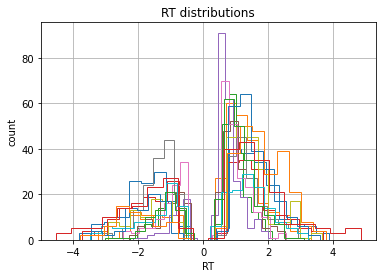

In [6]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# plt.savefig('hddm_demo_fig_00.pdf')

Check number of trials of each condition for each participant.

In [7]:
data.groupby(['subj_idx', 'stim']).size()

subj_idx  stim
0         LL       73
          WL      151
          WW       74
1         LL       74
          WL      153
          WW       71
2         LL       73
          WL      147
          WW       73
3         LL       62
          WL      129
          WW       64
4         LL       70
          WL      144
          WW       69
5         LL       77
          WL      155
          WW       71
6         LL       73
          WL      154
          WW       72
7         LL       77
          WL      142
          WW       75
8         LL       74
          WL      148
          WW       71
9         LL       53
          WL      110
          WW       54
10        LL       76
          WL      157
          WW       76
11        LL       73
          WL      153
          WW       79
12        LL       61
          WL      138
          WW       68
13        LL       68
          WL      135
          WW       71
dtype: int64

## Fitting a hierarchical model

In [8]:
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m1 = hddm.HDDM(data)
# find a good starting point which helps with the convergence.
m1.find_starting_values()
# start drawing 7000 samples and discarding 5000 as burn-in
m1.sample(2000, burn=500)

/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 93.7 sec

In [9]:
stats = m1.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'a_subj.0', 'a_subj.1'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.97077,0.0986342,1.78272,1.90761,1.96669,2.02978,2.17429,0.00287417
a_std,0.343632,0.0895815,0.216969,0.285285,0.329374,0.382573,0.563081,0.003233
a_subj.0,2.20164,0.0637937,2.07935,2.15757,2.20194,2.24363,2.32874,0.00188098
a_subj.1,2.11062,0.062394,1.99284,2.06781,2.10766,2.1505,2.23417,0.00225457


Plotting a
Plotting a_std
Plotting v
Plotting t


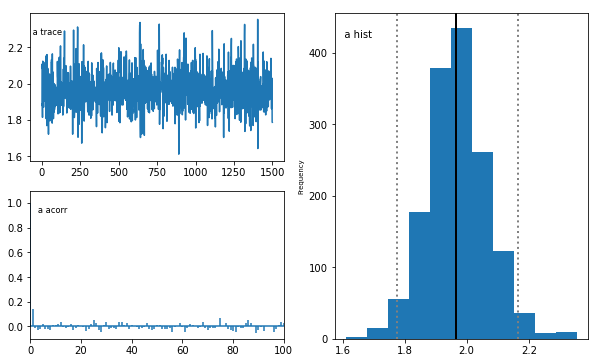

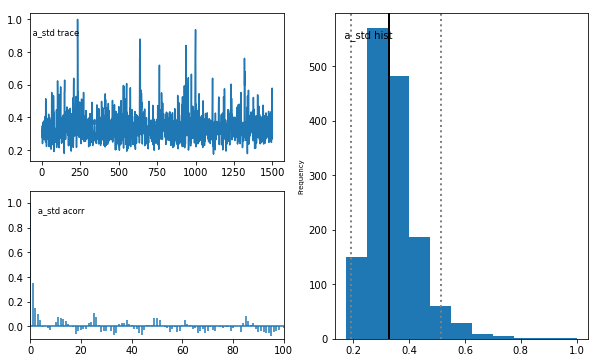

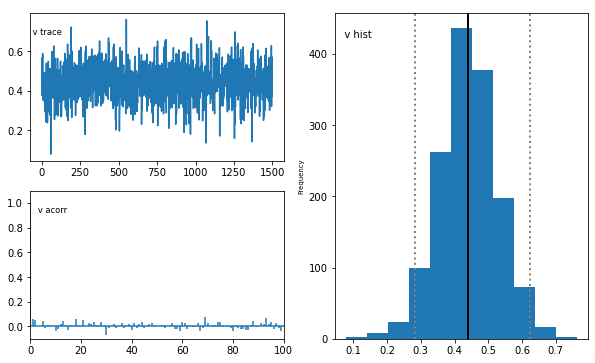

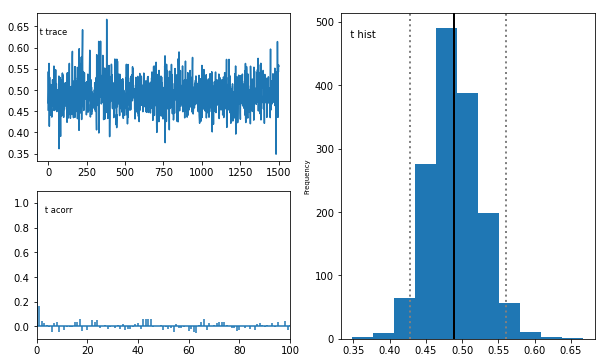

In [10]:
m1.plot_posteriors(['a', 't', 'v', 'a_std'])

/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:580: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.ceil(nrows), columns, subj_i+1)
/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:580: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.ceil(nrows), columns, subj_i+1)
/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:580: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.ceil(nrows), columns, subj_i+1)
/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:580: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is d

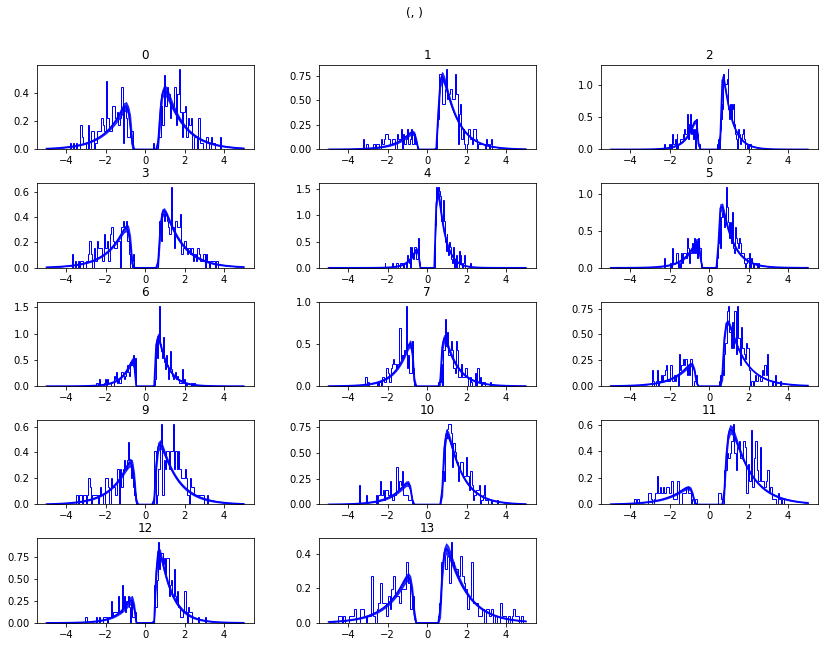

In [12]:
m1.plot_posterior_predictive(figsize=(14, 10))

## Calculate Gelman_rubin r hat.

The original tutorial used `for` loop:

In [13]:
# models = []
# for i in range(5):
#     m = hddm.HDDM(data)
#     m.find_starting_values()
#     m.sample(5000, burn=20)
#     models.append(m)

# hddm.analyze.gelman_rubin(models)

Here, we replace the `for` loop with parallel processing:

In [14]:
# parallel processing related packages
from p_tqdm import p_map
from functools import partial

In [15]:
def ms1(id, data=None, samples=None, burn=None, save_name="cavanagh2011_m1"): 

    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    m = hddm.HDDM(data)
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [16]:
samples = 5000  # Cavanagh used 30,000 and 10, 000 burn.
burn = 1000    
thin = 1
chains = 4

In [17]:
models_1 = p_map(partial(ms1, data=data, samples=samples, burn=burn),
                 range(chains)) # progess bar is a mess ;(

running model0


  0%|          | 0/4 [00:00<?, ?it/s]

running model2
running model3
running model1


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


                   1%                  ] 91 of 5000 complete in 4.2 secc[                  0%                  ] 12 of 5000 complete in 0.5 sec[                  0%                  ] 13 of 5000 complete in 0.5 sec[                  0%                  ] 12 of 5000 complete in 0.5 sec[                  0%                  ] 23 of 5000 complete in 1.0 sec[                  0%                  ] 24 of 5000 complete in 1.0 sec[                  0%                  ] 24 of 5000 complete in 1.1 sec[                  0%                  ] 23 of 5000 complete in 1.1 sec[                  0%                  ] 34 of 5000 complete in 1.5 sec[                  0%                  ] 35 of 5000 complete in 1.6 sec[                  0%                  ] 34 of 5000 complete in 1.6 sec[                  0%                  ] 36 of 5000 complete in 1.6 sec[                  0%                  ] 46 of 5000 complete in 2.1 sec[                  0%                  ] 45 of 5000 complete in 2.1 sec[    

 [--                6%                  ] 328 of 5000 complete in 15.2 sec[--                6%                  ] 334 of 5000 complete in 15.6 sec[--                6%                  ] 332 of 5000 complete in 15.6 sec[--                6%                  ] 334 of 5000 complete in 15.7 sec[--                6%                  ] 339 of 5000 complete in 15.7 sec[--                6%                  ] 345 of 5000 complete in 16.1 sec[--                6%                  ] 342 of 5000 complete in 16.1 sec[--                7%                  ] 350 of 5000 complete in 16.2 sec[--                6%                  ] 345 of 5000 complete in 16.3 sec[--                7%                  ] 356 of 5000 complete in 16.6 sec[--                7%                  ] 353 of 5000 complete in 16.6 sec[--                7%                  ] 361 of 5000 complete in 16.7 sec[--                7%                  ] 356 of 5000 complete in 16.8 sec[--                7%                  ] 367 of 50

 [----             12%                  ] 644 of 5000 complete in 30.1 sec[----             12%                  ] 642 of 5000 complete in 30.2 sec[----             13%                  ] 651 of 5000 complete in 30.3 sec[----             13%                  ] 655 of 5000 complete in 30.4 sec[----             13%                  ] 655 of 5000 complete in 30.7 sec[----             13%                  ] 653 of 5000 complete in 30.7 sec[-----            13%                  ] 662 of 5000 complete in 30.8 sec[-----            13%                  ] 666 of 5000 complete in 30.9 sec[-----            13%                  ] 664 of 5000 complete in 31.2 sec[-----            13%                  ] 666 of 5000 complete in 31.2 sec[-----            13%                  ] 673 of 5000 complete in 31.3 sec[-----            13%                  ] 677 of 5000 complete in 31.4 sec[-----            13%                  ] 675 of 5000 complete in 31.7 sec[-----            13%                  ] 677 of 50

 --------         23%                  ] 1159 of 5000 complete in 54.3 sec[-------          19%                  ] 962 of 5000 complete in 44.9 sec[-------          19%                  ] 965 of 5000 complete in 45.0 sec[-------          19%                  ] 966 of 5000 complete in 45.2 sec[-------          19%                  ] 964 of 5000 complete in 45.4 sec[-------          19%                  ] 973 of 5000 complete in 45.4 sec[-------          19%                  ] 976 of 5000 complete in 45.6 sec[-------          19%                  ] 977 of 5000 complete in 45.7 sec[-------          19%                  ] 976 of 5000 complete in 45.9 sec[-------          19%                  ] 984 of 5000 complete in 45.9 sec[-------          19%                  ] 987 of 5000 complete in 46.1 sec[-------          19%                  ] 988 of 5000 complete in 46.2 sec[-------          19%                  ] 994 of 5000 complete in 46.4 sec[-------          19%                  ] 988 of 50

 [---------        25%                  ] 1271 of 5000 complete in 59.5 sec[---------        25%                  ] 1270 of 5000 complete in 59.5 sec[---------        25%                  ] 1264 of 5000 complete in 59.5 sec[---------        25%                  ] 1280 of 5000 complete in 59.8 sec[---------        25%                  ] 1282 of 5000 complete in 60.0 sec[---------        25%                  ] 1281 of 5000 complete in 60.0 sec[---------        25%                  ] 1276 of 5000 complete in 60.1 sec[---------        25%                  ] 1291 of 5000 complete in 60.3 sec[---------        25%                  ] 1293 of 5000 complete in 60.5 sec[---------        25%                  ] 1292 of 5000 complete in 60.6 sec[---------        25%                  ] 1288 of 5000 complete in 60.6 sec[---------        26%                  ] 1302 of 5000 complete in 60.9 sec[---------        26%                  ] 1304 of 5000 complete in 61.0 sec[---------        26%                

 [------------     31%                  ] 1582 of 5000 complete in 74.0 sec[-----------      31%                  ] 1578 of 5000 complete in 74.1 sec[------------     31%                  ] 1586 of 5000 complete in 74.1 sec[------------     31%                  ] 1585 of 5000 complete in 74.2 sec[------------     31%                  ] 1593 of 5000 complete in 74.5 sec[------------     31%                  ] 1589 of 5000 complete in 74.6 sec[------------     31%                  ] 1597 of 5000 complete in 74.6 sec[------------     31%                  ] 1596 of 5000 complete in 74.8 sec[------------     32%                  ] 1604 of 5000 complete in 75.0 sec[------------     32%                  ] 1600 of 5000 complete in 75.1 sec[------------     32%                  ] 1608 of 5000 complete in 75.1 sec[------------     32%                  ] 1607 of 5000 complete in 75.3 sec[------------     32%                  ] 1616 of 5000 complete in 75.5 sec[------------     32%                

 [--------------   37%                  ] 1887 of 5000 complete in 88.5 sec[--------------   37%                  ] 1888 of 5000 complete in 88.5 sec[--------------   37%                  ] 1899 of 5000 complete in 88.7 sec[--------------   37%                  ] 1896 of 5000 complete in 88.7 sec[--------------   37%                  ] 1898 of 5000 complete in 89.0 sec[--------------   37%                  ] 1899 of 5000 complete in 89.0 sec[--------------   38%                  ] 1910 of 5000 complete in 89.2 sec[--------------   38%                  ] 1908 of 5000 complete in 89.2 sec[--------------   38%                  ] 1909 of 5000 complete in 89.5 sec[--------------   38%                  ] 1911 of 5000 complete in 89.6 sec[--------------   38%                  ] 1921 of 5000 complete in 89.7 sec[--------------   38%                  ] 1919 of 5000 complete in 89.7 sec[--------------   38%                  ] 1920 of 5000 complete in 90.0 sec[--------------   38%                

 [---------------- 43%                  ] 2199 of 5000 complete in 102.8 sec[---------------- 43%                  ] 2199 of 5000 complete in 103.0 sec[---------------- 44%                  ] 2204 of 5000 complete in 103.2 sec[---------------- 44%                  ] 2210 of 5000 complete in 103.3 sec[---------------- 44%                  ] 2213 of 5000 complete in 103.3 sec[---------------- 44%                  ] 2211 of 5000 complete in 103.6 sec[---------------- 44%                  ] 2216 of 5000 complete in 103.8 sec[---------------- 44%                  ] 2221 of 5000 complete in 103.8 sec[---------------- 44%                  ] 2224 of 5000 complete in 103.8 sec[---------------- 44%                  ] 2222 of 5000 complete in 104.1 sec[---------------- 44%                  ] 2227 of 5000 complete in 104.3 sec[---------------- 44%                  ] 2232 of 5000 complete in 104.3 sec[---------------- 44%                  ] 2235 of 5000 complete in 104.4 sec[---------------- 44%   

 [-----------------49%                  ] 2499 of 5000 complete in 117.2 sec[-----------------50%                  ] 2508 of 5000 complete in 117.3 sec[-----------------50%                  ] 2506 of 5000 complete in 117.5 sec[-----------------50%                  ] 2502 of 5000 complete in 117.7 sec[-----------------50%                  ] 2510 of 5000 complete in 117.7 sec[-----------------50%                  ] 2519 of 5000 complete in 117.8 sec[-----------------50%                  ] 2516 of 5000 complete in 118.0 sec[-----------------50%                  ] 2513 of 5000 complete in 118.2 sec[-----------------50%                  ] 2522 of 5000 complete in 118.3 sec[-----------------50%                  ] 2530 of 5000 complete in 118.3 sec[-----------------50%                  ] 2527 of 5000 complete in 118.5 sec[-----------------50%                  ] 2524 of 5000 complete in 118.7 sec[-----------------50%                  ] 2533 of 5000 complete in 118.8 sec[-----------------50%   

 [-----------------55%-                 ] 2797 of 5000 complete in 131.7 sec[-----------------55%-                 ] 2793 of 5000 complete in 131.8 sec[-----------------56%-                 ] 2808 of 5000 complete in 131.9 sec[-----------------56%-                 ] 2811 of 5000 complete in 132.0 sec[-----------------56%-                 ] 2808 of 5000 complete in 132.2 sec[-----------------56%-                 ] 2804 of 5000 complete in 132.4 sec[-----------------56%-                 ] 2819 of 5000 complete in 132.5 sec[-----------------56%-                 ] 2822 of 5000 complete in 132.5 sec[-----------------56%-                 ] 2819 of 5000 complete in 132.7 sec[-----------------56%-                 ] 2815 of 5000 complete in 132.9 sec[-----------------56%-                 ] 2830 of 5000 complete in 133.0 sec[-----------------56%-                 ] 2833 of 5000 complete in 133.0 sec[-----------------56%-                 ] 2830 of 5000 complete in 133.3 sec[-----------------56%-  

 [-----------------62%---               ] 3103 of 5000 complete in 146.1 sec[-----------------62%---               ] 3105 of 5000 complete in 146.2 sec[-----------------62%---               ] 3101 of 5000 complete in 146.3 sec[-----------------61%---               ] 3095 of 5000 complete in 146.5 sec[-----------------62%---               ] 3113 of 5000 complete in 146.6 sec[-----------------62%---               ] 3117 of 5000 complete in 146.8 sec[-----------------62%---               ] 3112 of 5000 complete in 146.8 sec[-----------------62%---               ] 3107 of 5000 complete in 147.0 sec[-----------------62%---               ] 3124 of 5000 complete in 147.2 sec[-----------------62%---               ] 3128 of 5000 complete in 147.3 sec[-----------------62%---               ] 3123 of 5000 complete in 147.4 sec[-----------------62%---               ] 3118 of 5000 complete in 147.6 sec[-----------------62%---               ] 3134 of 5000 complete in 147.7 sec[-----------------62%---

 -----------------72%-------           ] 3641 of 5000 complete in 172.2 secc[-----------------67%-----             ] 3390 of 5000 complete in 160.6 sec[-----------------68%-----             ] 3407 of 5000 complete in 160.7 sec[-----------------68%-----             ] 3414 of 5000 complete in 160.8 sec[-----------------68%-----             ] 3409 of 5000 complete in 161.1 sec[-----------------68%-----             ] 3401 of 5000 complete in 161.2 sec[-----------------68%-----             ] 3418 of 5000 complete in 161.3 sec[-----------------68%------            ] 3425 of 5000 complete in 161.3 sec[-----------------68%-----             ] 3420 of 5000 complete in 161.6 sec[-----------------68%-----             ] 3411 of 5000 complete in 161.7 sec[-----------------68%------            ] 3429 of 5000 complete in 161.8 sec[-----------------68%------            ] 3435 of 5000 complete in 161.9 sec[-----------------68%------            ] 3431 of 5000 complete in 162.2 sec[-----------------68%---

 [-----------------74%--------          ] 3711 of 5000 complete in 175.1 sec[-----------------74%--------          ] 3705 of 5000 complete in 175.3 sec[-----------------73%--------          ] 3698 of 5000 complete in 175.4 sec[-----------------74%--------          ] 3714 of 5000 complete in 175.4 sec[-----------------74%--------          ] 3722 of 5000 complete in 175.6 sec[-----------------74%--------          ] 3709 of 5000 complete in 175.9 sec[-----------------74%--------          ] 3716 of 5000 complete in 175.9 sec[-----------------74%--------          ] 3725 of 5000 complete in 176.0 sec[-----------------74%--------          ] 3733 of 5000 complete in 176.1 sec[-----------------74%--------          ] 3720 of 5000 complete in 176.4 sec[-----------------74%--------          ] 3727 of 5000 complete in 176.4 sec[-----------------74%--------          ] 3736 of 5000 complete in 176.5 sec[-----------------74%--------          ] 3744 of 5000 complete in 176.6 sec[-----------------74%---

 [-----------------79%----------        ] 3996 of 5000 complete in 189.5 sec[-----------------79%----------        ] 3999 of 5000 complete in 189.5 sec[-----------------80%----------        ] 4015 of 5000 complete in 189.6 sec[-----------------80%----------        ] 4020 of 5000 complete in 190.0 sec[-----------------80%----------        ] 4008 of 5000 complete in 190.1 sec[-----------------80%----------        ] 4011 of 5000 complete in 190.1 sec[-----------------80%----------        ] 4025 of 5000 complete in 190.1 sec[-----------------80%----------        ] 4031 of 5000 complete in 190.5 sec[-----------------80%----------        ] 4019 of 5000 complete in 190.6 sec[-----------------80%----------        ] 4022 of 5000 complete in 190.6 sec[-----------------80%----------        ] 4036 of 5000 complete in 190.6 sec[-----------------80%----------        ] 4042 of 5000 complete in 191.1 sec[-----------------80%----------        ] 4030 of 5000 complete in 191.1 sec[-----------------80%---

 [-----------------85%------------      ] 4294 of 5000 complete in 203.9 sec[-----------------86%------------      ] 4316 of 5000 complete in 204.0 sec[-----------------86%------------      ] 4306 of 5000 complete in 204.2 sec[-----------------86%------------      ] 4321 of 5000 complete in 204.3 sec[-----------------86%------------      ] 4305 of 5000 complete in 204.4 sec[-----------------86%------------      ] 4327 of 5000 complete in 204.6 sec[-----------------86%------------      ] 4317 of 5000 complete in 204.7 sec[-----------------86%------------      ] 4332 of 5000 complete in 204.8 sec[-----------------86%------------      ] 4316 of 5000 complete in 204.9 sec[-----------------86%------------      ] 4338 of 5000 complete in 205.1 sec[-----------------86%------------      ] 4328 of 5000 complete in 205.2 sec[-----------------86%-------------     ] 4343 of 5000 complete in 205.3 sec[-----------------86%------------      ] 4327 of 5000 complete in 205.4 sec[-----------------86%---

 -----------------92%---------------   ] 4648 of 5000 complete in 220.3 secc[-----------------92%---------------   ] 4617 of 5000 complete in 218.3 sec[-----------------92%--------------    ] 4601 of 5000 complete in 218.6 sec[-----------------92%---------------   ] 4623 of 5000 complete in 218.7 sec[-----------------92%---------------   ] 4615 of 5000 complete in 218.7 sec[-----------------92%---------------   ] 4629 of 5000 complete in 218.8 sec[-----------------92%---------------   ] 4612 of 5000 complete in 219.1 sec[-----------------92%---------------   ] 4626 of 5000 complete in 219.3 sec[-----------------92%---------------   ] 4634 of 5000 complete in 219.3 sec[-----------------92%---------------   ] 4640 of 5000 complete in 219.3 sec[-----------------92%---------------   ] 4623 of 5000 complete in 219.7 sec[-----------------92%---------------   ] 4637 of 5000 complete in 219.8 sec[-----------------92%---------------   ] 4645 of 5000 complete in 219.8 sec[-----------------93%---

 [-----------------98%----------------- ] 4916 of 5000 complete in 232.7 sec[-----------------98%----------------- ] 4910 of 5000 complete in 232.8 sec[-----------------98%----------------- ] 4925 of 5000 complete in 232.8 sec[-----------------98%----------------- ] 4915 of 5000 complete in 233.2 sec[-----------------98%----------------- ] 4926 of 5000 complete in 233.2 sec[-----------------98%----------------- ] 4921 of 5000 complete in 233.3 sec[-----------------98%----------------- ] 4936 of 5000 complete in 233.4 sec[-----------------98%----------------- ] 4926 of 5000 complete in 233.7 sec[-----------------98%----------------- ] 4937 of 5000 complete in 233.7 sec[-----------------98%----------------- ] 4932 of 5000 complete in 233.9 sec[-----------------98%----------------- ] 4947 of 5000 complete in 233.9 sec[-----------------98%----------------- ] 4948 of 5000 complete in 234.2 sec[-----------------98%----------------- ] 4937 of 5000 complete in 234.3 sec[-----------------98%---

In [18]:
hddm.analyze.gelman_rubin(models_1)

{'a': 1.0001348548632887,
 'a_std': 1.0004312379454792,
 'a_subj.0': 1.0001619139321798,
 'a_subj.1': 1.0001996129752702,
 'a_subj.2': 1.0000161517520514,
 'a_subj.3': 1.000338113263646,
 'a_subj.4': 1.0001448743459092,
 'a_subj.5': 0.999937540912421,
 'a_subj.6': 1.0004679959743683,
 'a_subj.7': 1.0002336781190218,
 'a_subj.8': 1.0001891209516163,
 'a_subj.9': 1.0002743450694331,
 'a_subj.10': 0.9999436249654781,
 'a_subj.11': 1.000259867677573,
 'a_subj.12': 1.0002359142549095,
 'a_subj.13': 1.0001264839779005,
 'v': 0.9998941614982337,
 'v_std': 1.0000809276509994,
 'v_subj.0': 0.9999478507783386,
 'v_subj.1': 0.9999198824751621,
 'v_subj.2': 0.9999815984145664,
 'v_subj.3': 0.999895684987778,
 'v_subj.4': 1.0002757887360827,
 'v_subj.5': 1.0001318279543865,
 'v_subj.6': 0.9999500969288814,
 'v_subj.7': 1.000006777794634,
 'v_subj.8': 0.9999660444159165,
 'v_subj.9': 1.000136188475209,
 'v_subj.10': 0.9999379358766058,
 'v_subj.11': 0.9999355410439481,
 'v_subj.12': 1.00013888178246

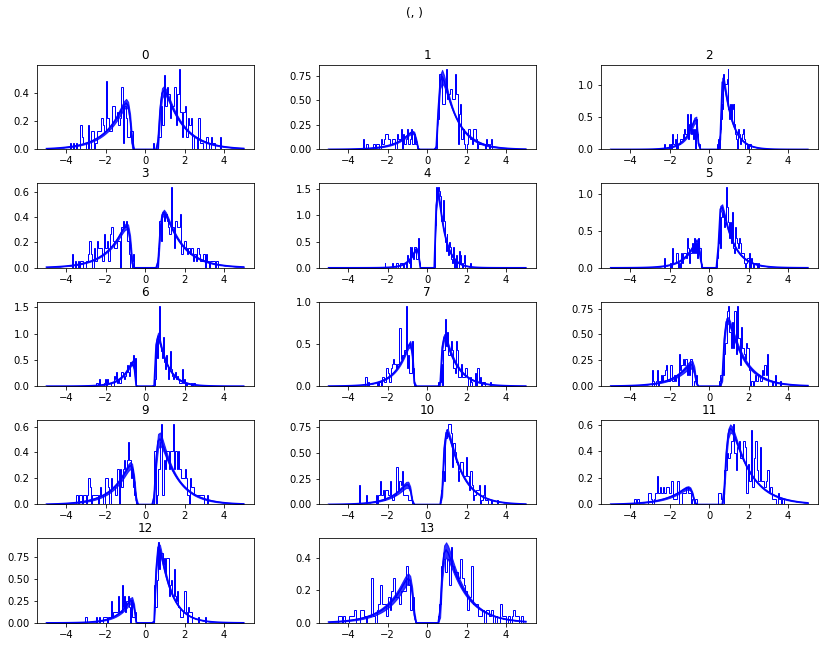

In [19]:
models_1[0].plot_posterior_predictive(figsize=(14, 10))

In [20]:
m_comb = kabuki.utils.concat_models(models_1) # combine four chains together

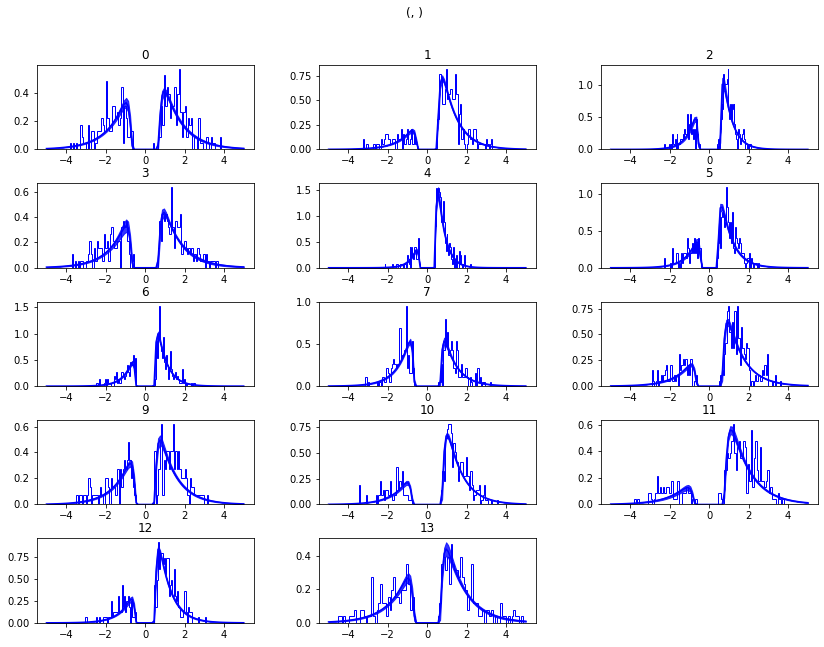

In [21]:
m_comb.plot_posterior_predictive(figsize=(14, 10))

### Model 2: `v` depends on stimulus

The original tutorial used code like this:

```
m_stim = hddm.HDDM(data, depends_on={'v': 'stim'})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)
```

Here we defined a function for stimulus coding and used parallel processing

In [22]:
def ms2(id, data=None, samples=None, burn=None, save_name="cavanagh2011_m2"): 

    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    
    m = hddm.HDDM(data, depends_on={'v': 'stim'})
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # save the model data
    m.save(mname)
    
    return m

In [23]:
# note: the samples, burn, and chains can be changed too
models_2 = p_map(partial(ms2, data=data, samples=samples, burn=burn),
                 range(chains))

  0%|          | 0/4 [00:00<?, ?it/s]

running model0
running model1
running model2
running model3


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


                   2%                  ] 111 of 5000 complete in 12.0 sec                 0%                  ] 6 of 5000 complete in 0.5 sec[                  0%                  ] 6 of 5000 complete in 0.5 sec[                  0%                  ] 6 of 5000 complete in 0.6 sec[                  0%                  ] 11 of 5000 complete in 1.1 sec[                  0%                  ] 11 of 5000 complete in 1.1 sec[                  0%                  ] 11 of 5000 complete in 1.1 sec[                  0%                  ] 11 of 5000 complete in 1.1 sec[                  0%                  ] 16 of 5000 complete in 1.6 sec[                  0%                  ] 16 of 5000 complete in 1.6 sec[                  0%                  ] 16 of 5000 complete in 1.7 sec[                  0%                  ] 16 of 5000 complete in 1.6 sec[                  0%                  ] 21 of 5000 complete in 2.1 sec[                  0%                  ] 21 of 5000 complete in 2.2 sec[        

 [-                 3%                  ] 151 of 5000 complete in 16.4 sec[-                 3%                  ] 151 of 5000 complete in 16.3 sec[-                 3%                  ] 151 of 5000 complete in 16.5 sec[-                 3%                  ] 151 of 5000 complete in 16.8 sec[-                 3%                  ] 156 of 5000 complete in 16.9 sec[-                 3%                  ] 156 of 5000 complete in 16.8 sec[-                 3%                  ] 156 of 5000 complete in 17.1 sec[-                 3%                  ] 156 of 5000 complete in 17.4 sec[-                 3%                  ] 161 of 5000 complete in 17.4 sec[-                 3%                  ] 161 of 5000 complete in 17.4 sec[-                 3%                  ] 161 of 5000 complete in 17.6 sec[-                 3%                  ] 161 of 5000 complete in 17.9 sec[-                 3%                  ] 166 of 5000 complete in 18.0 sec[-                 3%                  ] 166 of 50

 --                6%                  ] 310 of 5000 complete in 34.1 secc[--                5%                  ] 291 of 5000 complete in 32.1 sec[--                5%                  ] 296 of 5000 complete in 32.2 sec[--                5%                  ] 291 of 5000 complete in 32.4 sec[--                5%                  ] 295 of 5000 complete in 32.5 sec[--                5%                  ] 296 of 5000 complete in 32.6 sec[--                6%                  ] 301 of 5000 complete in 32.8 sec[--                5%                  ] 296 of 5000 complete in 33.0 sec[--                6%                  ] 300 of 5000 complete in 33.0 sec[--                6%                  ] 301 of 5000 complete in 33.2 sec[--                6%                  ] 306 of 5000 complete in 33.3 sec[--                6%                  ] 301 of 5000 complete in 33.6 sec[--                6%                  ] 305 of 5000 complete in 33.6 sec[--                6%                  ] 306 of 50

 [---               8%                  ] 436 of 5000 complete in 48.0 sec[---               8%                  ] 436 of 5000 complete in 47.9 sec[---               8%                  ] 431 of 5000 complete in 48.2 sec[---               8%                  ] 435 of 5000 complete in 48.3 sec[---               8%                  ] 441 of 5000 complete in 48.5 sec[---               8%                  ] 441 of 5000 complete in 48.4 sec[---               8%                  ] 436 of 5000 complete in 48.8 sec[---               8%                  ] 440 of 5000 complete in 48.9 sec[---               8%                  ] 446 of 5000 complete in 49.1 sec[---               8%                  ] 446 of 5000 complete in 49.0 sec[---               8%                  ] 441 of 5000 complete in 49.4 sec[---               8%                  ] 445 of 5000 complete in 49.4 sec[---               9%                  ] 451 of 5000 complete in 49.6 sec[---               9%                  ] 451 of 50

 [----             11%                  ] 576 of 5000 complete in 63.6 sec[----             11%                  ] 575 of 5000 complete in 63.7 sec[----             11%                  ] 571 of 5000 complete in 63.9 sec[----             11%                  ] 581 of 5000 complete in 63.9 sec[----             11%                  ] 581 of 5000 complete in 64.2 sec[----             11%                  ] 580 of 5000 complete in 64.3 sec[----             11%                  ] 586 of 5000 complete in 64.4 sec[----             11%                  ] 576 of 5000 complete in 64.5 sec[----             11%                  ] 586 of 5000 complete in 64.7 sec[----             11%                  ] 585 of 5000 complete in 64.8 sec[----             11%                  ] 591 of 5000 complete in 65.0 sec[----             11%                  ] 581 of 5000 complete in 65.1 sec[----             11%                  ] 591 of 5000 complete in 65.3 sec[----             11%                  ] 590 of 50

 [-----            14%                  ] 715 of 5000 complete in 79.4 sec[-----            14%                  ] 711 of 5000 complete in 79.4 sec[-----            14%                  ] 720 of 5000 complete in 79.7 sec[-----            14%                  ] 721 of 5000 complete in 79.6 sec[-----            14%                  ] 716 of 5000 complete in 79.9 sec[-----            14%                  ] 720 of 5000 complete in 80.0 sec[-----            14%                  ] 726 of 5000 complete in 80.2 sec[-----            14%                  ] 725 of 5000 complete in 80.3 sec[-----            14%                  ] 721 of 5000 complete in 80.5 sec[-----            14%                  ] 725 of 5000 complete in 80.5 sec[-----            14%                  ] 730 of 5000 complete in 80.8 sec[-----            14%                  ] 731 of 5000 complete in 80.7 sec[-----            14%                  ] 726 of 5000 complete in 81.0 sec[-----            14%                  ] 730 of 50

 [------           17%                  ] 855 of 5000 complete in 95.0 sec[------           17%                  ] 861 of 5000 complete in 95.2 sec[------           17%                  ] 860 of 5000 complete in 95.3 sec[------           17%                  ] 856 of 5000 complete in 95.3 sec[------           17%                  ] 860 of 5000 complete in 95.6 sec[------           17%                  ] 866 of 5000 complete in 95.7 sec[------           17%                  ] 865 of 5000 complete in 95.9 sec[------           17%                  ] 861 of 5000 complete in 95.9 sec[------           17%                  ] 865 of 5000 complete in 96.1 sec[------           17%                  ] 871 of 5000 complete in 96.3 sec[------           17%                  ] 866 of 5000 complete in 96.4 sec[------           17%                  ] 870 of 5000 complete in 96.5 sec[------           17%                  ] 870 of 5000 complete in 96.7 sec[------           17%                  ] 876 of 50

 [-------          19%                  ] 995 of 5000 complete in 110.6 sec[-------          20%                  ] 1001 of 5000 complete in 110.7 sec[-------          19%                  ] 996 of 5000 complete in 111.0 sec[-------          20%                  ] 1000 of 5000 complete in 111.1 sec[-------          20%                  ] 1000 of 5000 complete in 111.2 sec[-------          20%                  ] 1006 of 5000 complete in 111.3 sec[-------          20%                  ] 1001 of 5000 complete in 111.5 sec[-------          20%                  ] 1005 of 5000 complete in 111.7 sec[-------          20%                  ] 1005 of 5000 complete in 111.7 sec[-------          20%                  ] 1011 of 5000 complete in 111.8 sec[-------          20%                  ] 1006 of 5000 complete in 112.1 sec[-------          20%                  ] 1010 of 5000 complete in 112.2 sec[-------          20%                  ] 1010 of 5000 complete in 112.3 sec[-------          20%     

 [--------         22%                  ] 1136 of 5000 complete in 125.9 sec[--------         22%                  ] 1135 of 5000 complete in 126.2 sec[--------         22%                  ] 1135 of 5000 complete in 126.3 sec[--------         22%                  ] 1136 of 5000 complete in 126.5 sec[--------         22%                  ] 1141 of 5000 complete in 126.5 sec[--------         22%                  ] 1140 of 5000 complete in 126.7 sec[--------         22%                  ] 1140 of 5000 complete in 126.9 sec[--------         22%                  ] 1141 of 5000 complete in 127.1 sec[--------         22%                  ] 1146 of 5000 complete in 127.1 sec[--------         22%                  ] 1145 of 5000 complete in 127.3 sec[--------         22%                  ] 1145 of 5000 complete in 127.5 sec[--------         22%                  ] 1146 of 5000 complete in 127.7 sec[--------         23%                  ] 1151 of 5000 complete in 127.6 sec[--------         23%   

 [---------        25%                  ] 1270 of 5000 complete in 141.5 sec[---------        25%                  ] 1275 of 5000 complete in 141.6 sec[---------        25%                  ] 1271 of 5000 complete in 141.7 sec[---------        25%                  ] 1276 of 5000 complete in 141.7 sec[---------        25%                  ] 1275 of 5000 complete in 142.0 sec[---------        25%                  ] 1280 of 5000 complete in 142.2 sec[---------        25%                  ] 1276 of 5000 complete in 142.2 sec[---------        25%                  ] 1281 of 5000 complete in 142.3 sec[---------        25%                  ] 1280 of 5000 complete in 142.6 sec[---------        25%                  ] 1285 of 5000 complete in 142.7 sec[---------        25%                  ] 1281 of 5000 complete in 142.8 sec[---------        25%                  ] 1286 of 5000 complete in 142.8 sec[---------        25%                  ] 1285 of 5000 complete in 143.1 sec[---------        25%   

 [----------       28%                  ] 1406 of 5000 complete in 156.7 sec[----------       28%                  ] 1410 of 5000 complete in 156.7 sec[----------       28%                  ] 1411 of 5000 complete in 156.8 sec[----------       28%                  ] 1411 of 5000 complete in 157.2 sec[----------       28%                  ] 1415 of 5000 complete in 157.2 sec[----------       28%                  ] 1415 of 5000 complete in 157.3 sec[----------       28%                  ] 1416 of 5000 complete in 157.3 sec[----------       28%                  ] 1416 of 5000 complete in 157.7 sec[----------       28%                  ] 1420 of 5000 complete in 157.8 sec[----------       28%                  ] 1420 of 5000 complete in 157.8 sec[----------       28%                  ] 1421 of 5000 complete in 157.8 sec[----------       28%                  ] 1421 of 5000 complete in 158.3 sec[----------       28%                  ] 1425 of 5000 complete in 158.3 sec[----------       28%   

 [-----------      30%                  ] 1545 of 5000 complete in 171.7 sec[-----------      30%                  ] 1546 of 5000 complete in 172.0 sec[-----------      31%                  ] 1550 of 5000 complete in 172.1 sec[-----------      31%                  ] 1551 of 5000 complete in 172.0 sec[-----------      31%                  ] 1550 of 5000 complete in 172.2 sec[-----------      31%                  ] 1551 of 5000 complete in 172.6 sec[-----------      31%                  ] 1555 of 5000 complete in 172.7 sec[-----------      31%                  ] 1556 of 5000 complete in 172.6 sec[-----------      31%                  ] 1555 of 5000 complete in 172.8 sec[-----------      31%                  ] 1556 of 5000 complete in 173.1 sec[-----------      31%                  ] 1560 of 5000 complete in 173.2 sec[-----------      31%                  ] 1561 of 5000 complete in 173.1 sec[-----------      31%                  ] 1560 of 5000 complete in 173.3 sec[-----------      31%   

 [------------     33%                  ] 1681 of 5000 complete in 187.1 sec[------------     33%                  ] 1685 of 5000 complete in 187.1 sec[------------     33%                  ] 1686 of 5000 complete in 187.1 sec[------------     33%                  ] 1690 of 5000 complete in 187.5 sec[------------     33%                  ] 1691 of 5000 complete in 187.6 sec[------------     33%                  ] 1690 of 5000 complete in 187.7 sec[------------     33%                  ] 1686 of 5000 complete in 187.7 sec[------------     33%                  ] 1695 of 5000 complete in 188.1 sec[------------     33%                  ] 1696 of 5000 complete in 188.1 sec[------------     33%                  ] 1695 of 5000 complete in 188.2 sec[------------     33%                  ] 1691 of 5000 complete in 188.3 sec[------------     34%                  ] 1700 of 5000 complete in 188.6 sec[------------     34%                  ] 1701 of 5000 complete in 188.6 sec[------------     34%   

 [-------------    36%                  ] 1816 of 5000 complete in 202.3 sec[-------------    36%                  ] 1824 of 5000 complete in 202.5 sec[-------------    36%                  ] 1825 of 5000 complete in 202.6 sec[-------------    36%                  ] 1826 of 5000 complete in 202.6 sec[-------------    36%                  ] 1821 of 5000 complete in 202.9 sec[-------------    36%                  ] 1829 of 5000 complete in 203.0 sec[-------------    36%                  ] 1830 of 5000 complete in 203.2 sec[-------------    36%                  ] 1831 of 5000 complete in 203.1 sec[-------------    36%                  ] 1826 of 5000 complete in 203.4 sec[-------------    36%                  ] 1834 of 5000 complete in 203.6 sec[-------------    36%                  ] 1835 of 5000 complete in 203.7 sec[-------------    36%                  ] 1836 of 5000 complete in 203.7 sec[-------------    36%                  ] 1831 of 5000 complete in 204.0 sec[-------------    36%   

 ---------------  40%                  ] 2011 of 5000 complete in 222.9 secc[--------------   39%                  ] 1959 of 5000 complete in 217.5 sec[--------------   39%                  ] 1956 of 5000 complete in 217.8 sec[--------------   39%                  ] 1966 of 5000 complete in 217.8 sec[--------------   39%                  ] 1965 of 5000 complete in 218.0 sec[--------------   39%                  ] 1964 of 5000 complete in 218.1 sec[--------------   39%                  ] 1961 of 5000 complete in 218.4 sec[--------------   39%                  ] 1971 of 5000 complete in 218.4 sec[--------------   39%                  ] 1970 of 5000 complete in 218.5 sec[--------------   39%                  ] 1969 of 5000 complete in 218.6 sec[--------------   39%                  ] 1966 of 5000 complete in 218.9 sec[---------------  39%                  ] 1976 of 5000 complete in 218.9 sec[---------------  39%                  ] 1975 of 5000 complete in 219.1 sec[---------------  39%   

 ---------------- 43%                  ] 2171 of 5000 complete in 241.6 secc[---------------  42%                  ] 2101 of 5000 complete in 233.0 sec[---------------  41%                  ] 2099 of 5000 complete in 233.3 sec[---------------  41%                  ] 2096 of 5000 complete in 233.3 sec[---------------  42%                  ] 2105 of 5000 complete in 233.6 sec[---------------- 42%                  ] 2106 of 5000 complete in 233.6 sec[---------------  42%                  ] 2104 of 5000 complete in 233.9 sec[---------------  42%                  ] 2101 of 5000 complete in 233.9 sec[---------------- 42%                  ] 2110 of 5000 complete in 234.1 sec[---------------- 42%                  ] 2111 of 5000 complete in 234.2 sec[---------------- 42%                  ] 2106 of 5000 complete in 234.4 sec[---------------- 42%                  ] 2109 of 5000 complete in 234.4 sec[---------------- 42%                  ] 2115 of 5000 complete in 234.7 sec[---------------- 42%   

 [-----------------44%                  ] 2240 of 5000 complete in 248.6 sec[-----------------44%                  ] 2241 of 5000 complete in 248.6 sec[-----------------44%                  ] 2239 of 5000 complete in 248.8 sec[---------------- 44%                  ] 2236 of 5000 complete in 248.9 sec[-----------------44%                  ] 2245 of 5000 complete in 249.2 sec[-----------------44%                  ] 2246 of 5000 complete in 249.2 sec[-----------------44%                  ] 2244 of 5000 complete in 249.4 sec[-----------------44%                  ] 2241 of 5000 complete in 249.5 sec[-----------------45%                  ] 2250 of 5000 complete in 249.8 sec[-----------------45%                  ] 2251 of 5000 complete in 249.8 sec[-----------------44%                  ] 2249 of 5000 complete in 249.9 sec[-----------------44%                  ] 2246 of 5000 complete in 250.0 sec[-----------------45%                  ] 2255 of 5000 complete in 250.3 sec[-----------------45%   

 [-----------------47%                  ] 2375 of 5000 complete in 263.9 sec[-----------------47%                  ] 2370 of 5000 complete in 264.0 sec[-----------------47%                  ] 2381 of 5000 complete in 264.2 sec[-----------------47%                  ] 2378 of 5000 complete in 264.4 sec[-----------------47%                  ] 2380 of 5000 complete in 264.5 sec[-----------------47%                  ] 2375 of 5000 complete in 264.6 sec[-----------------47%                  ] 2386 of 5000 complete in 264.8 sec[-----------------47%                  ] 2383 of 5000 complete in 265.0 sec[-----------------47%                  ] 2385 of 5000 complete in 265.1 sec[-----------------47%                  ] 2380 of 5000 complete in 265.1 sec[-----------------47%                  ] 2391 of 5000 complete in 265.4 sec[-----------------47%                  ] 2388 of 5000 complete in 265.6 sec[-----------------47%                  ] 2390 of 5000 complete in 265.6 sec[-----------------47%   

 [-----------------50%                  ] 2514 of 5000 complete in 279.1 sec[-----------------50%                  ] 2512 of 5000 complete in 279.4 sec[-----------------50%                  ] 2514 of 5000 complete in 279.5 sec[-----------------50%                  ] 2510 of 5000 complete in 279.6 sec[-----------------50%                  ] 2519 of 5000 complete in 279.7 sec[-----------------50%                  ] 2517 of 5000 complete in 280.0 sec[-----------------50%                  ] 2519 of 5000 complete in 280.0 sec[-----------------50%                  ] 2515 of 5000 complete in 280.2 sec[-----------------50%                  ] 2524 of 5000 complete in 280.2 sec[-----------------50%                  ] 2522 of 5000 complete in 280.5 sec[-----------------50%                  ] 2524 of 5000 complete in 280.6 sec[-----------------50%                  ] 2520 of 5000 complete in 280.7 sec[-----------------50%                  ] 2529 of 5000 complete in 280.8 sec[-----------------50%   

 [-----------------52%                  ] 2649 of 5000 complete in 294.5 sec[-----------------52%                  ] 2647 of 5000 complete in 294.6 sec  [-----------------53%                  ] 2654 of 5000 complete in 294.9 sec[-----------------53%                  ] 2650 of 5000 complete in 295.0 sec[-----------------53%                  ] 2654 of 5000 complete in 295.0 sec[-----------------53%                  ] 2652 of 5000 complete in 295.2 sec[-----------------53%                  ] 2659 of 5000 complete in 295.5 sec[-----------------53%                  ] 2659 of 5000 complete in 295.6 sec[-----------------53%                  ] 2655 of 5000 complete in 295.6 sec[-----------------53%                  ] 2657 of 5000 complete in 295.7 sec[-----------------53%                  ] 2664 of 5000 complete in 296.0 sec[-----------------53%                  ] 2664 of 5000 complete in 296.1 sec[-----------------53%                  ] 2660 of 5000 complete in 296.1 sec[-----------------53% 

 -----------------56%-                 ] 2808 of 5000 complete in 312.3 secc[-----------------55%-                 ] 2789 of 5000 complete in 310.0 sec[-----------------55%-                 ] 2784 of 5000 complete in 310.1 sec[-----------------55%-                 ] 2787 of 5000 complete in 310.2 sec[-----------------55%-                 ] 2793 of 5000 complete in 310.7 sec[-----------------55%-                 ] 2794 of 5000 complete in 310.6 sec[-----------------55%-                 ] 2789 of 5000 complete in 310.7 sec[-----------------55%-                 ] 2792 of 5000 complete in 310.8 sec[-----------------55%-                 ] 2799 of 5000 complete in 311.1 sec[-----------------55%-                 ] 2794 of 5000 complete in 311.2 sec[-----------------55%-                 ] 2798 of 5000 complete in 311.3 sec[-----------------55%-                 ] 2797 of 5000 complete in 311.3 sec[-----------------56%-                 ] 2804 of 5000 complete in 311.6 sec[-----------------55%-  

 [-----------------58%--                ] 2924 of 5000 complete in 325.2 sec[-----------------58%--                ] 2927 of 5000 complete in 325.6 sec[-----------------58%--                ] 2928 of 5000 complete in 325.7 sec[-----------------58%--                ] 2924 of 5000 complete in 325.8 sec[-----------------58%--                ] 2929 of 5000 complete in 325.8 sec[-----------------58%--                ] 2932 of 5000 complete in 326.2 sec[-----------------58%--                ] 2933 of 5000 complete in 326.2 sec[-----------------58%--                ] 2929 of 5000 complete in 326.4 sec[-----------------58%--                ] 2934 of 5000 complete in 326.3 sec[-----------------58%--                ] 2937 of 5000 complete in 326.7 sec[-----------------58%--                ] 2938 of 5000 complete in 326.8 sec[-----------------58%--                ] 2939 of 5000 complete in 326.9 sec[-----------------58%--                ] 2934 of 5000 complete in 327.0 sec[-----------------58%-- 

 [-----------------61%---               ] 3063 of 5000 complete in 340.8 sec[-----------------61%---               ] 3059 of 5000 complete in 340.8 sec[-----------------61%---               ] 3064 of 5000 complete in 340.8 sec[-----------------61%---               ] 3067 of 5000 complete in 341.3 sec[-----------------61%---               ] 3068 of 5000 complete in 341.3 sec[-----------------61%---               ] 3064 of 5000 complete in 341.4 sec[-----------------61%---               ] 3069 of 5000 complete in 341.4 sec[-----------------61%---               ] 3072 of 5000 complete in 341.8 sec[-----------------61%---               ] 3073 of 5000 complete in 341.9 sec[-----------------61%---               ] 3069 of 5000 complete in 341.9 sec[-----------------61%---               ] 3074 of 5000 complete in 341.9 sec[-----------------61%---               ] 3077 of 5000 complete in 342.4 sec[-----------------61%---               ] 3078 of 5000 complete in 342.4 sec[-----------------61%---

 -----------------65%----              ] 3279 of 5000 complete in 365.1 secc[-----------------64%----              ] 3203 of 5000 complete in 356.2 sec[-----------------64%----              ] 3202 of 5000 complete in 356.3 sec[-----------------63%----              ] 3199 of 5000 complete in 356.4 sec[-----------------64%----              ] 3204 of 5000 complete in 356.6 sec[-----------------64%----              ] 3208 of 5000 complete in 356.8 sec[-----------------64%----              ] 3207 of 5000 complete in 356.8 sec[-----------------64%----              ] 3204 of 5000 complete in 356.9 sec[-----------------64%----              ] 3209 of 5000 complete in 357.2 sec[-----------------64%----              ] 3212 of 5000 complete in 357.4 sec[-----------------64%----              ] 3213 of 5000 complete in 357.3 sec[-----------------64%----              ] 3209 of 5000 complete in 357.4 sec[-----------------64%----              ] 3214 of 5000 complete in 357.7 sec[-----------------64%---

 -----------------66%-----             ] 3339 of 5000 complete in 371.9 secc[-----------------66%-----             ] 3343 of 5000 complete in 371.6 sec[-----------------66%-----             ] 3339 of 5000 complete in 371.6 sec [-----------------66%-----             ] 3342 of 5000 complete in 371.9 sec[-----------------66%-----             ] 3348 of 5000 complete in 372.2 sec[-----------------66%-----             ] 3344 of 5000 complete in 372.2 sec  [-----------------66%-----             ] 3344 of 5000 complete in 372.4 sec[-----------------66%-----             ] 3347 of 5000 complete in 372.4 sec[-----------------67%-----             ] 3353 of 5000 complete in 372.7 sec[-----------------66%-----             ] 3349 of 5000 complete in 372.8 sec[-----------------66%-----             ] 3349 of 5000 complete in 372.9 sec[-----------------67%-----             ] 3352 of 5000 complete in 373.0 sec[-----------------67%-----             ] 3358 of 5000 complete in 373.2 sec[-----------------67%

 [-----------------69%------            ] 3477 of 5000 complete in 386.8 sec[-----------------69%------            ] 3474 of 5000 complete in 386.9 sec[-----------------69%------            ] 3483 of 5000 complete in 387.1 sec[-----------------69%------            ] 3479 of 5000 complete in 387.3 sec[-----------------69%------            ] 3482 of 5000 complete in 387.4 sec[-----------------69%------            ] 3479 of 5000 complete in 387.4 sec[-----------------69%------            ] 3488 of 5000 complete in 387.6 sec[-----------------69%------            ] 3484 of 5000 complete in 387.9 sec[-----------------69%------            ] 3487 of 5000 complete in 387.9 sec[-----------------69%------            ] 3484 of 5000 complete in 387.9 sec[-----------------69%------            ] 3493 of 5000 complete in 388.1 sec[-----------------69%------            ] 3492 of 5000 complete in 388.5 sec[-----------------69%------            ] 3489 of 5000 complete in 388.4 sec[-----------------69%---

 -----------------73%-------           ] 3652 of 5000 complete in 406.4 secc[-----------------72%-------           ] 3617 of 5000 complete in 402.4 sec[-----------------72%-------           ] 3614 of 5000 complete in 402.4 sec[-----------------72%-------           ] 3614 of 5000 complete in 402.5 sec[-----------------72%-------           ] 3623 of 5000 complete in 402.6 sec[-----------------72%-------           ] 3622 of 5000 complete in 403.0 sec[-----------------72%-------           ] 3619 of 5000 complete in 403.0 sec[-----------------72%-------           ] 3619 of 5000 complete in 403.0 sec[-----------------72%-------           ] 3628 of 5000 complete in 403.2 sec[-----------------72%-------           ] 3627 of 5000 complete in 403.6 sec[-----------------72%-------           ] 3624 of 5000 complete in 403.6 sec[-----------------72%-------           ] 3623 of 5000 complete in 403.5 sec[-----------------72%-------           ] 3633 of 5000 complete in 403.8 sec[-----------------72%---

 -----------------77%---------         ] 3853 of 5000 complete in 429.6 secc[-----------------74%--------          ] 3748 of 5000 complete in 417.6 sec[-----------------75%--------          ] 3757 of 5000 complete in 418.1 sec [-----------------75%--------          ] 3763 of 5000 complete in 418.2 sec[-----------------75%--------          ] 3753 of 5000 complete in 418.2 sec[-----------------75%--------          ] 3762 of 5000 complete in 418.7 sec[-----------------75%--------          ] 3758 of 5000 complete in 418.8 sec[-----------------75%--------          ] 3768 of 5000 complete in 418.8 sec[-----------------75%--------          ] 3758 of 5000 complete in 418.8 sec[-----------------75%--------          ] 3767 of 5000 complete in 419.2 sec[-----------------75%--------          ] 3773 of 5000 complete in 419.4 sec[-----------------75%--------          ] 3763 of 5000 complete in 419.4 sec[-----------------75%--------          ] 3763 of 5000 complete in 419.3 sec[-----------------75%--

 [-----------------77%---------         ] 3888 of 5000 complete in 433.3 sec[-----------------77%---------         ] 3888 of 5000 complete in 433.4 sec[-----------------78%---------         ] 3903 of 5000 complete in 433.5 sec[-----------------77%---------         ] 3897 of 5000 complete in 433.6 sec[-----------------77%---------         ] 3893 of 5000 complete in 433.9 sec[-----------------77%---------         ] 3893 of 5000 complete in 433.9 sec[-----------------78%---------         ] 3908 of 5000 complete in 434.1 sec[-----------------78%---------         ] 3902 of 5000 complete in 434.1 sec[-----------------77%---------         ] 3898 of 5000 complete in 434.5 sec[-----------------77%---------         ] 3898 of 5000 complete in 434.5 sec[-----------------78%---------         ] 3913 of 5000 complete in 434.6 sec[-----------------78%---------         ] 3907 of 5000 complete in 434.6 sec[-----------------78%---------         ] 3903 of 5000 complete in 435.0 sec  [-----------------78%-

 [-----------------80%----------        ] 4023 of 5000 complete in 448.4 sec[-----------------80%----------        ] 4031 of 5000 complete in 448.6 sec[-----------------80%----------        ] 4043 of 5000 complete in 448.8 sec[-----------------80%----------        ] 4028 of 5000 complete in 448.9 sec[-----------------80%----------        ] 4028 of 5000 complete in 448.9 sec[-----------------80%----------        ] 4036 of 5000 complete in 449.1 sec[-----------------80%----------        ] 4048 of 5000 complete in 449.3 sec[-----------------80%----------        ] 4033 of 5000 complete in 449.5 sec[-----------------80%----------        ] 4033 of 5000 complete in 449.5 sec[-----------------80%----------        ] 4041 of 5000 complete in 449.7 sec[-----------------81%----------        ] 4053 of 5000 complete in 449.9 sec[-----------------80%----------        ] 4038 of 5000 complete in 450.0 sec[-----------------80%----------        ] 4038 of 5000 complete in 450.0 sec[-----------------80%---

 [-----------------83%-----------       ] 4178 of 5000 complete in 463.9 sec[-----------------83%-----------       ] 4171 of 5000 complete in 463.9 sec[-----------------83%-----------       ] 4163 of 5000 complete in 464.0 sec[-----------------83%-----------       ] 4163 of 5000 complete in 463.9 sec  [-----------------83%-----------       ] 4183 of 5000 complete in 464.4 sec[-----------------83%-----------       ] 4176 of 5000 complete in 464.4 sec[-----------------83%-----------       ] 4168 of 5000 complete in 464.5 sec[-----------------83%-----------       ] 4168 of 5000 complete in 464.5 sec[-----------------83%-----------       ] 4188 of 5000 complete in 465.0 sec[-----------------83%-----------       ] 4181 of 5000 complete in 465.0 sec[-----------------83%-----------       ] 4173 of 5000 complete in 465.1 sec[-----------------83%-----------       ] 4173 of 5000 complete in 465.1 sec[-----------------83%-----------       ] 4193 of 5000 complete in 465.5 sec[-----------------83%-

 [-----------------85%------------      ] 4298 of 5000 complete in 479.0 sec[-----------------85%------------      ] 4298 of 5000 complete in 478.9 sec[-----------------86%------------      ] 4311 of 5000 complete in 479.5 sec[-----------------86%------------      ] 4318 of 5000 complete in 479.5 sec[-----------------86%------------      ] 4303 of 5000 complete in 479.5 sec[-----------------86%------------      ] 4303 of 5000 complete in 479.5 sec[-----------------86%------------      ] 4316 of 5000 complete in 480.1 sec[-----------------86%------------      ] 4323 of 5000 complete in 480.1 sec[-----------------86%------------      ] 4308 of 5000 complete in 480.1 sec[-----------------86%------------      ] 4308 of 5000 complete in 480.0 sec[-----------------86%------------      ] 4321 of 5000 complete in 480.6 sec[-----------------86%------------      ] 4313 of 5000 complete in 480.6 sec[-----------------86%------------      ] 4328 of 5000 complete in 480.6 sec[-----------------86%---

 [-----------------88%-------------     ] 4438 of 5000 complete in 494.3 sec[-----------------88%-------------     ] 4438 of 5000 complete in 494.5 sec[-----------------88%-------------     ] 4446 of 5000 complete in 494.6 sec[-----------------89%-------------     ] 4453 of 5000 complete in 494.7 sec[-----------------88%-------------     ] 4443 of 5000 complete in 494.9 sec[-----------------88%-------------     ] 4443 of 5000 complete in 495.1 sec[-----------------89%-------------     ] 4451 of 5000 complete in 495.1 sec[-----------------89%-------------     ] 4458 of 5000 complete in 495.3 sec[-----------------88%-------------     ] 4448 of 5000 complete in 495.4 sec[-----------------88%-------------     ] 4448 of 5000 complete in 495.6 sec[-----------------89%-------------     ] 4456 of 5000 complete in 495.7 sec[-----------------89%-------------     ] 4463 of 5000 complete in 495.9 sec[-----------------89%-------------     ] 4453 of 5000 complete in 496.0 sec[-----------------89%---

 -----------------91%--------------    ] 4573 of 5000 complete in 509.6 sec [-----------------91%--------------    ] 4588 of 5000 complete in 509.6 sec[-----------------91%--------------    ] 4586 of 5000 complete in 510.0 sec[-----------------91%--------------    ] 4578 of 5000 complete in 509.9 sec[-----------------91%--------------    ] 4593 of 5000 complete in 510.1 sec[-----------------91%--------------    ] 4578 of 5000 complete in 510.1 sec[-----------------91%--------------    ] 4591 of 5000 complete in 510.6 sec[-----------------91%--------------    ] 4583 of 5000 complete in 510.5 sec[-----------------91%--------------    ] 4598 of 5000 complete in 510.7 sec[-----------------91%--------------    ] 4583 of 5000 complete in 510.7 sec[-----------------91%--------------    ] 4596 of 5000 complete in 511.1 sec[-----------------91%--------------    ] 4588 of 5000 complete in 511.1 sec[-----------------91%--------------    ] 4588 of 5000 complete in 511.2 sec[-----------------92%---

 [-----------------94%---------------   ] 4721 of 5000 complete in 524.9 sec[-----------------94%---------------   ] 4713 of 5000 complete in 524.9 sec[-----------------94%---------------   ] 4713 of 5000 complete in 525.1 sec[-----------------94%---------------   ] 4727 of 5000 complete in 525.2 sec[-----------------94%---------------   ] 4726 of 5000 complete in 525.5 sec[-----------------94%---------------   ] 4718 of 5000 complete in 525.5 sec[-----------------94%---------------   ] 4718 of 5000 complete in 525.6 sec[-----------------94%---------------   ] 4732 of 5000 complete in 525.8 sec[-----------------94%---------------   ] 4731 of 5000 complete in 526.0 sec[-----------------94%---------------   ] 4723 of 5000 complete in 526.1 sec[-----------------94%---------------   ] 4723 of 5000 complete in 526.2 sec[-----------------94%----------------  ] 4737 of 5000 complete in 526.3 sec[-----------------94%---------------   ] 4736 of 5000 complete in 526.6 sec[-----------------94%---

 [-----------------97%----------------  ] 4862 of 5000 complete in 540.2 sec[-----------------96%----------------  ] 4848 of 5000 complete in 540.1 sec[-----------------97%----------------  ] 4861 of 5000 complete in 540.6 sec[-----------------97%----------------  ] 4853 of 5000 complete in 540.6 sec[-----------------97%----------------  ] 4867 of 5000 complete in 540.7 sec[-----------------97%----------------  ] 4853 of 5000 complete in 540.6 sec[-----------------97%----------------  ] 4866 of 5000 complete in 541.1 sec[-----------------97%----------------  ] 4858 of 5000 complete in 541.1 sec[-----------------97%----------------  ] 4858 of 5000 complete in 541.2 sec[-----------------97%----------------- ] 4872 of 5000 complete in 541.3 sec[-----------------97%----------------- ] 4871 of 5000 complete in 541.7 sec[-----------------97%----------------  ] 4863 of 5000 complete in 541.7 sec[-----------------97%----------------  ] 4863 of 5000 complete in 541.7 sec[-----------------97%---

 -----------------99%----------------- ] 4998 of 5000 complete in 556.5 secc[-----------------100%-----------------] 5000 of 5000 complete in 555.7 sec[-----------------99%----------------- ] 4988 of 5000 complete in 555.6 sec[-----------------99%----------------- ] 4996 of 5000 complete in 555.8 sec[-----------------99%----------------- ] 4993 of 5000 complete in 555.9 sec [-----------------100%-----------------] 5001 of 5000 complete in 556.4 sec [-----------------99%----------------- ] 4998 of 5000 complete in 556.7 sec[-----------------100%-----------------] 5000 of 5000 complete in 556.8 sec[-----------------100%-----------------] 5000 of 5000 complete in 557.0 sec

In [24]:
m_stim_all = kabuki.utils.concat_models(models_2) 

Text(0.5, 1.0, 'Posterior of drift-rate group means')

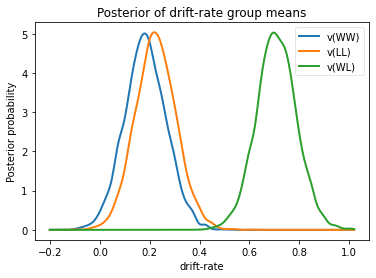

In [25]:
v_WW, v_LL, v_WL = m_stim_all.nodes_db.node[['v(WW)', 'v(LL)', 'v(WL)']]
hddm.analyze.plot_posterior_nodes([v_WW, v_LL, v_WL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
# plt.savefig('hddm_demo_fig_06.pdf')

In [26]:
print("P(WW > LL) = ", (v_WW.trace() > v_LL.trace()).mean())
print("P(LL > WL) = ", (v_LL.trace() > v_WL.trace()).mean())

P(WW > LL) =  0.363125
P(LL > WL) =  6.25e-05


In [27]:
print("Lumped model DIC: %f" % m1.dic)
print("Stimulus model DIC: %f" % m_stim_all.dic)

Lumped model DIC: 10973.506104
Stimulus model DIC: 10787.104606


## Within-subject effects

In [28]:
from patsy import dmatrix
dmatrix("C(stim, Treatment('WL'))", data.head(10))

DesignMatrix with shape (10, 3)
  Intercept  C(stim, Treatment('WL'))[T.LL]  C(stim, Treatment('WL'))[T.WW]
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
  Terms:
    'Intercept' (column 0)
    "C(stim, Treatment('WL'))" (columns 1:3)

The original code in the tutorial was:

```
m_within_subj = hddm.HDDMRegressor(data, "v ~ C(stim, Treatment('WL'))")
m_within_subj.sample(5000, burn=200)
```

Here we used four chains for parallel processing

In [29]:
def run_m_reg(id, data=None, samples=None, burn=None, save_name="cavanagh2011_reg"): 
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    
    m = hddm.HDDMRegressor(data,
                           "v ~ C(stim, Treatment('WL'))")
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [30]:
m_reg_list = p_map(partial(run_m_reg, data=data, samples=5000, burn=1000),
                   range(chains))

  0%|          | 0/4 [00:00<?, ?it/s]

Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]
Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]
Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]
Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


                   0%                  ] 31 of 5000 complete in 7.7 sec[                  0%                  ] 2 of 5000 complete in 0.6 sec[                  0%                  ] 2 of 5000 complete in 0.7 sec[                  0%                  ] 2 of 5000 complete in 0.7 sec[                  0%                  ] 4 of 5000 complete in 1.3 sec[                  0%                  ] 4 of 5000 complete in 1.3 sec[                  0%                  ] 4 of 5000 complete in 1.3 sec[                  0%                  ] 4 of 5000 complete in 1.5 sec[                  0%                  ] 6 of 5000 complete in 1.8 sec[                  0%                  ] 6 of 5000 complete in 1.9 sec[                  0%                  ] 6 of 5000 complete in 2.0 sec[                  0%                  ] 7 of 5000 complete in 2.1 sec[                  0%                  ] 8 of 5000 complete in 2.4 sec[                  0%                  ] 9 of 5000 complete in 2.5 sec[                  

 [                  1%                  ] 82 of 5000 complete in 19.6 sec[                  1%                  ] 81 of 5000 complete in 19.8 sec[                  1%                  ] 81 of 5000 complete in 19.8 sec[                  1%                  ] 82 of 5000 complete in 19.9 sec[                  1%                  ] 83 of 5000 complete in 20.3 sec[                  1%                  ] 85 of 5000 complete in 20.3 sec[                  1%                  ] 84 of 5000 complete in 20.6 sec[                  1%                  ] 85 of 5000 complete in 20.7 sec[                  1%                  ] 86 of 5000 complete in 21.0 sec[                  1%                  ] 88 of 5000 complete in 21.0 sec[                  1%                  ] 87 of 5000 complete in 21.2 sec[                  1%                  ] 87 of 5000 complete in 21.2 sec[                  1%                  ] 90 of 5000 complete in 21.5 sec[                  1%                  ] 89 of 5000 complete in

 [-                 3%                  ] 160 of 5000 complete in 38.1 sec[-                 3%                  ] 159 of 5000 complete in 38.4 sec[-                 3%                  ] 159 of 5000 complete in 38.4 sec[-                 3%                  ] 160 of 5000 complete in 38.5 sec[-                 3%                  ] 163 of 5000 complete in 38.7 sec  [-                 3%                  ] 162 of 5000 complete in 39.2 sec[-                 3%                  ] 162 of 5000 complete in 39.1 sec[-                 3%                  ] 163 of 5000 complete in 39.2 sec[-                 3%                  ] 166 of 5000 complete in 39.4 sec[-                 3%                  ] 166 of 5000 complete in 39.8 sec[-                 3%                  ] 165 of 5000 complete in 39.9 sec[-                 3%                  ] 165 of 5000 complete in 39.8 sec[-                 3%                  ] 169 of 5000 complete in 40.1 sec[-                 3%                  ] 169 of 

 --                5%                  ] 280 of 5000 complete in 67.1 secc[-                 4%                  ] 240 of 5000 complete in 57.5 sec[-                 4%                  ] 243 of 5000 complete in 57.6 sec[-                 4%                  ] 241 of 5000 complete in 57.8 sec[-                 4%                  ] 241 of 5000 complete in 58.0 sec[-                 4%                  ] 243 of 5000 complete in 58.2 sec[-                 4%                  ] 246 of 5000 complete in 58.3 sec[-                 4%                  ] 244 of 5000 complete in 58.5 sec[-                 4%                  ] 245 of 5000 complete in 58.7 sec[-                 4%                  ] 244 of 5000 complete in 58.7 sec[-                 4%                  ] 249 of 5000 complete in 58.9 sec[-                 4%                  ] 247 of 5000 complete in 59.2 sec[-                 4%                  ] 247 of 5000 complete in 59.3 sec[-                 4%                  ] 247 of 50

 [--                6%                  ] 317 of 5000 complete in 76.0 sec[--                6%                  ] 321 of 5000 complete in 76.3 sec[--                6%                  ] 319 of 5000 complete in 76.4 sec[--                6%                  ] 318 of 5000 complete in 76.4 sec[--                6%                  ] 320 of 5000 complete in 76.6 sec[--                6%                  ] 321 of 5000 complete in 76.9 sec[--                6%                  ] 324 of 5000 complete in 77.0 sec[--                6%                  ] 321 of 5000 complete in 77.1 sec[--                6%                  ] 323 of 5000 complete in 77.4 sec[--                6%                  ] 324 of 5000 complete in 77.6 sec[--                6%                  ] 327 of 5000 complete in 77.7 sec[--                6%                  ] 324 of 5000 complete in 77.9 sec[--                6%                  ] 326 of 5000 complete in 78.1 sec[--                6%                  ] 327 of 50

 [--                7%                  ] 393 of 5000 complete in 93.9 sec[--                7%                  ] 392 of 5000 complete in 94.4 sec[--                7%                  ] 394 of 5000 complete in 94.6 sec[---               7%                  ] 396 of 5000 complete in 94.6 sec[--                7%                  ] 392 of 5000 complete in 94.7 sec[---               7%                  ] 395 of 5000 complete in 95.2 sec[---               7%                  ] 398 of 5000 complete in 95.1 sec[--                7%                  ] 394 of 5000 complete in 95.2 sec[---               7%                  ] 397 of 5000 complete in 95.4 sec[---               7%                  ] 397 of 5000 complete in 95.7 sec[---               8%                  ] 400 of 5000 complete in 95.6 sec[---               7%                  ] 397 of 5000 complete in 95.9 sec[---               8%                  ] 400 of 5000 complete in 96.1 sec[---               8%                  ] 400 of 50

 ---              10%                  ] 511 of 5000 complete in 122.2 secc[---               9%                  ] 469 of 5000 complete in 112.4 sec[---               9%                  ] 468 of 5000 complete in 113.0 sec[---               9%                  ] 472 of 5000 complete in 113.0 sec [---               9%                  ] 468 of 5000 complete in 113.1 sec[---               9%                  ] 470 of 5000 complete in 113.6 sec[---               9%                  ] 471 of 5000 complete in 113.7 sec[---               9%                  ] 475 of 5000 complete in 113.8 sec[---               9%                  ] 475 of 5000 complete in 113.7 sec[---               9%                  ] 473 of 5000 complete in 114.2 sec[---               9%                  ] 473 of 5000 complete in 114.3 sec[---               9%                  ] 478 of 5000 complete in 114.4 sec[---               9%                  ] 478 of 5000 complete in 114.4 sec[---               9%               

 [----             10%                  ] 546 of 5000 complete in 130.8 sec[----             10%                  ] 548 of 5000 complete in 131.0 sec[----             10%                  ] 544 of 5000 complete in 131.2 sec[----             10%                  ] 546 of 5000 complete in 131.5 sec[----             10%                  ] 549 of 5000 complete in 131.5 sec[----             11%                  ] 550 of 5000 complete in 131.6 sec[----             10%                  ] 547 of 5000 complete in 131.8 sec[----             11%                  ] 551 of 5000 complete in 132.0 sec[----             10%                  ] 549 of 5000 complete in 132.2 sec[----             11%                  ] 553 of 5000 complete in 132.2 sec[----             11%                  ] 550 of 5000 complete in 132.5 sec[----             11%                  ] 554 of 5000 complete in 132.6 sec[----             11%                  ] 552 of 5000 complete in 132.9 sec[----             11%                

 [----             12%                  ] 620 of 5000 complete in 149.4 sec[----             12%                  ] 628 of 5000 complete in 149.7 sec[----             12%                  ] 623 of 5000 complete in 149.8 sec[----             12%                  ] 628 of 5000 complete in 149.8 sec[----             12%                  ] 623 of 5000 complete in 150.1 sec[----             12%                  ] 630 of 5000 complete in 150.3 sec[----             12%                  ] 631 of 5000 complete in 150.3 sec[----             12%                  ] 626 of 5000 complete in 150.5 sec[----             12%                  ] 626 of 5000 complete in 150.8 sec[----             12%                  ] 633 of 5000 complete in 151.0 sec[----             12%                  ] 634 of 5000 complete in 151.0 sec[----             12%                  ] 629 of 5000 complete in 151.2 sec[----             12%                  ] 629 of 5000 complete in 151.5 sec[----             12%                

 -----            15%                  ] 758 of 5000 complete in 181.9 secc[-----            14%                  ] 704 of 5000 complete in 168.1 sec[-----            14%                  ] 700 of 5000 complete in 168.4 sec[-----            14%                  ] 702 of 5000 complete in 168.4 sec[-----            14%                  ] 707 of 5000 complete in 168.5 sec[-----            14%                  ] 706 of 5000 complete in 168.6 sec[-----            14%                  ] 704 of 5000 complete in 168.9 sec[-----            14%                  ] 703 of 5000 complete in 169.1 sec[-----            14%                  ] 710 of 5000 complete in 169.2 sec[-----            14%                  ] 709 of 5000 complete in 169.3 sec[-----            14%                  ] 706 of 5000 complete in 169.4 sec[-----            14%                  ] 706 of 5000 complete in 169.8 sec[-----            14%                  ] 713 of 5000 complete in 169.9 sec[-----            14%                

 [-----            15%                  ] 776 of 5000 complete in 186.3 sec[-----            15%                  ] 782 of 5000 complete in 186.6 sec[-----            15%                  ] 777 of 5000 complete in 186.7 sec[-----            15%                  ] 783 of 5000 complete in 186.8 sec[-----            15%                  ] 779 of 5000 complete in 187.0 sec[-----            15%                  ] 779 of 5000 complete in 187.2 sec[-----            15%                  ] 785 of 5000 complete in 187.4 sec[-----            15%                  ] 786 of 5000 complete in 187.4 sec[-----            15%                  ] 782 of 5000 complete in 187.7 sec[-----            15%                  ] 782 of 5000 complete in 187.9 sec[-----            15%                  ] 788 of 5000 complete in 188.0 sec[-----            15%                  ] 788 of 5000 complete in 188.1 sec[-----            15%                  ] 784 of 5000 complete in 188.2 sec[-----            15%                

 ------           17%                  ] 881 of 5000 complete in 210.3 secc[------           17%                  ] 857 of 5000 complete in 204.7 sec[------           17%                  ] 854 of 5000 complete in 204.7 sec[------           17%                  ] 858 of 5000 complete in 204.7 sec[------           17%                  ] 854 of 5000 complete in 205.3 sec[------           17%                  ] 860 of 5000 complete in 205.2 sec[------           17%                  ] 860 of 5000 complete in 205.4 sec[------           17%                  ] 857 of 5000 complete in 205.4 sec[------           17%                  ] 862 of 5000 complete in 205.9 sec[------           17%                  ] 859 of 5000 complete in 205.9 sec[------           17%                  ] 857 of 5000 complete in 206.0 sec[------           17%                  ] 863 of 5000 complete in 205.9 sec[------           17%                  ] 865 of 5000 complete in 206.5 sec[------           17%                

 [-------          18%                  ] 929 of 5000 complete in 222.9 sec[-------          18%                  ] 933 of 5000 complete in 222.8 sec[-------          18%                  ] 929 of 5000 complete in 223.2 sec[-------          18%                  ] 937 of 5000 complete in 223.5 sec[-------          18%                  ] 936 of 5000 complete in 223.5 sec[-------          18%                  ] 932 of 5000 complete in 223.6 sec[-------          18%                  ] 931 of 5000 complete in 223.8 sec[-------          18%                  ] 938 of 5000 complete in 224.1 sec[-------          18%                  ] 940 of 5000 complete in 224.2 sec[-------          18%                  ] 935 of 5000 complete in 224.3 sec[-------          18%                  ] 934 of 5000 complete in 224.4 sec[-------          18%                  ] 942 of 5000 complete in 224.7 sec[-------          18%                  ] 937 of 5000 complete in 224.8 sec[-------          18%                

 [-------          20%                  ] 1007 of 5000 complete in 240.8 sec[-------          20%                  ] 1003 of 5000 complete in 241.1 sec[-------          20%                  ] 1013 of 5000 complete in 241.5 sec[-------          20%                  ] 1007 of 5000 complete in 241.6 sec[-------          20%                  ] 1010 of 5000 complete in 241.6 sec[-------          20%                  ] 1006 of 5000 complete in 241.8 sec[-------          20%                  ] 1009 of 5000 complete in 242.1 sec[-------          20%                  ] 1016 of 5000 complete in 242.3 sec[-------          20%                  ] 1013 of 5000 complete in 242.3 sec[-------          20%                  ] 1009 of 5000 complete in 242.6 sec[-------          20%                  ] 1012 of 5000 complete in 242.8 sec[-------          20%                  ] 1019 of 5000 complete in 243.0 sec[-------          20%                  ] 1016 of 5000 complete in 243.0 sec[-------          20%   

 [--------         21%                  ] 1085 of 5000 complete in 259.4 sec[--------         21%                  ] 1090 of 5000 complete in 259.8 sec[--------         21%                  ] 1082 of 5000 complete in 259.9 sec[--------         21%                  ] 1085 of 5000 complete in 260.0 sec[--------         21%                  ] 1088 of 5000 complete in 260.1 sec[--------         21%                  ] 1092 of 5000 complete in 260.3 sec[--------         21%                  ] 1084 of 5000 complete in 260.4 sec[--------         21%                  ] 1088 of 5000 complete in 260.7 sec[--------         21%                  ] 1091 of 5000 complete in 260.8 sec[--------         21%                  ] 1086 of 5000 complete in 261.0 sec[--------         21%                  ] 1095 of 5000 complete in 261.1 sec[--------         21%                  ] 1091 of 5000 complete in 261.4 sec[--------         21%                  ] 1088 of 5000 complete in 261.5 sec[--------         21%   

 [--------         23%                  ] 1163 of 5000 complete in 277.4 sec[--------         23%                  ] 1159 of 5000 complete in 277.5 sec[--------         23%                  ] 1155 of 5000 complete in 277.7 sec[--------         23%                  ] 1161 of 5000 complete in 278.0 sec[--------         23%                  ] 1166 of 5000 complete in 278.1 sec[--------         23%                  ] 1162 of 5000 complete in 278.1 sec[--------         23%                  ] 1158 of 5000 complete in 278.5 sec[--------         23%                  ] 1164 of 5000 complete in 278.7 sec[--------         23%                  ] 1169 of 5000 complete in 278.9 sec[--------         23%                  ] 1165 of 5000 complete in 278.8 sec[--------         23%                  ] 1161 of 5000 complete in 279.2 sec[--------         23%                  ] 1167 of 5000 complete in 279.3 sec[--------         23%                  ] 1167 of 5000 complete in 279.4 sec[--------         23%   

 [---------        24%                  ] 1230 of 5000 complete in 295.4 sec[---------        24%                  ] 1239 of 5000 complete in 295.7 sec[---------        24%                  ] 1236 of 5000 complete in 295.9 sec[---------        24%                  ] 1236 of 5000 complete in 296.0 sec[---------        24%                  ] 1233 of 5000 complete in 296.0 sec[---------        24%                  ] 1242 of 5000 complete in 296.4 sec[---------        24%                  ] 1239 of 5000 complete in 296.6 sec[---------        24%                  ] 1236 of 5000 complete in 296.7 sec[---------        24%                  ] 1239 of 5000 complete in 296.7 sec[---------        24%                  ] 1244 of 5000 complete in 297.0 sec[---------        24%                  ] 1241 of 5000 complete in 297.1 sec[---------        24%                  ] 1238 of 5000 complete in 297.3 sec[---------        24%                  ] 1242 of 5000 complete in 297.5 sec[---------        24%   

 [---------        26%                  ] 1308 of 5000 complete in 313.9 sec[---------        26%                  ] 1311 of 5000 complete in 314.0 sec[---------        26%                  ] 1313 of 5000 complete in 314.1 sec[----------       26%                  ] 1318 of 5000 complete in 314.4 sec[---------        26%                  ] 1311 of 5000 complete in 314.6 sec[---------        26%                  ] 1314 of 5000 complete in 314.7 sec[----------       26%                  ] 1316 of 5000 complete in 314.8 sec[----------       26%                  ] 1320 of 5000 complete in 314.9 sec[---------        26%                  ] 1314 of 5000 complete in 315.3 sec[----------       26%                  ] 1317 of 5000 complete in 315.4 sec[----------       26%                  ] 1322 of 5000 complete in 315.5 sec[----------       26%                  ] 1319 of 5000 complete in 315.5 sec[----------       26%                  ] 1319 of 5000 complete in 315.9 sec[----------       26%   

 [----------       27%                  ] 1386 of 5000 complete in 331.9 sec[----------       27%                  ] 1386 of 5000 complete in 332.5 sec[----------       27%                  ] 1393 of 5000 complete in 332.5 sec[----------       27%                  ] 1389 of 5000 complete in 332.5 sec[----------       27%                  ] 1389 of 5000 complete in 332.6 sec[----------       27%                  ] 1388 of 5000 complete in 333.0 sec[----------       27%                  ] 1396 of 5000 complete in 333.2 sec[----------       27%                  ] 1392 of 5000 complete in 333.3 sec[----------       27%                  ] 1392 of 5000 complete in 333.3 sec[----------       27%                  ] 1391 of 5000 complete in 333.7 sec[----------       27%                  ] 1399 of 5000 complete in 333.9 sec[----------       27%                  ] 1395 of 5000 complete in 334.0 sec[----------       27%                  ] 1395 of 5000 complete in 334.0 sec[----------       27%   

 [-----------      29%                  ] 1466 of 5000 complete in 350.7 sec[-----------      29%                  ] 1470 of 5000 complete in 350.8 sec[-----------      29%                  ] 1463 of 5000 complete in 350.8 sec[-----------      29%                  ] 1466 of 5000 complete in 351.1 sec[-----------      29%                  ] 1469 of 5000 complete in 351.4 sec[-----------      29%                  ] 1473 of 5000 complete in 351.5 sec[-----------      29%                  ] 1466 of 5000 complete in 351.5 sec[-----------      29%                  ] 1468 of 5000 complete in 351.6 sec[-----------      29%                  ] 1472 of 5000 complete in 352.1 sec[-----------      29%                  ] 1476 of 5000 complete in 352.2 sec[-----------      29%                  ] 1470 of 5000 complete in 352.1 sec[-----------      29%                  ] 1469 of 5000 complete in 352.3 sec[-----------      29%                  ] 1474 of 5000 complete in 352.6 sec[-----------      29%   

 [-----------      30%                  ] 1543 of 5000 complete in 368.8 sec[-----------      30%                  ] 1537 of 5000 complete in 368.8 sec[-----------      30%                  ] 1540 of 5000 complete in 368.8 sec[-----------      30%                  ] 1543 of 5000 complete in 369.1 sec[-----------      30%                  ] 1546 of 5000 complete in 369.4 sec[-----------      30%                  ] 1540 of 5000 complete in 369.5 sec[-----------      30%                  ] 1543 of 5000 complete in 369.5 sec[-----------      30%                  ] 1546 of 5000 complete in 369.8 sec[-----------      30%                  ] 1549 of 5000 complete in 370.1 sec[-----------      30%                  ] 1543 of 5000 complete in 370.2 sec[-----------      30%                  ] 1546 of 5000 complete in 370.2 sec[-----------      30%                  ] 1549 of 5000 complete in 370.6 sec[-----------      30%                  ] 1545 of 5000 complete in 370.8 sec[-----------      31%   

 [------------     32%                  ] 1616 of 5000 complete in 386.8 sec[------------     32%                  ] 1613 of 5000 complete in 387.0 sec[------------     32%                  ] 1619 of 5000 complete in 387.0 sec[------------     32%                  ] 1618 of 5000 complete in 387.3 sec[------------     32%                  ] 1621 of 5000 complete in 387.3 sec[------------     32%                  ] 1615 of 5000 complete in 387.6 sec[------------     32%                  ] 1622 of 5000 complete in 387.8 sec[------------     32%                  ] 1621 of 5000 complete in 388.0 sec[------------     32%                  ] 1624 of 5000 complete in 388.1 sec[------------     32%                  ] 1618 of 5000 complete in 388.3 sec[------------     32%                  ] 1625 of 5000 complete in 388.5 sec[------------     32%                  ] 1627 of 5000 complete in 388.8 sec[------------     32%                  ] 1624 of 5000 complete in 388.7 sec[------------     32%   

 [------------     33%                  ] 1696 of 5000 complete in 405.3 sec[------------     33%                  ] 1695 of 5000 complete in 405.3 sec[------------     33%                  ] 1698 of 5000 complete in 405.5 sec[------------     33%                  ] 1690 of 5000 complete in 405.7 sec[------------     33%                  ] 1699 of 5000 complete in 406.0 sec[------------     33%                  ] 1698 of 5000 complete in 406.0 sec[------------     34%                  ] 1701 of 5000 complete in 406.1 sec[------------     33%                  ] 1693 of 5000 complete in 406.4 sec[------------     34%                  ] 1703 of 5000 complete in 406.6 sec[------------     34%                  ] 1702 of 5000 complete in 406.7 sec[------------     34%                  ] 1701 of 5000 complete in 406.8 sec[------------     33%                  ] 1696 of 5000 complete in 407.1 sec[------------     34%                  ] 1706 of 5000 complete in 407.3 sec[------------     34%   

 -------------    36%                  ] 1835 of 5000 complete in 438.9 secc[-------------    35%                  ] 1767 of 5000 complete in 423.5 sec[-------------    35%                  ] 1773 of 5000 complete in 423.5 sec[-------------    35%                  ] 1773 of 5000 complete in 424.1 sec[-------------    35%                  ] 1773 of 5000 complete in 424.1 sec[-------------    35%                  ] 1770 of 5000 complete in 424.3 sec[-------------    35%                  ] 1776 of 5000 complete in 424.2 sec[-------------    35%                  ] 1776 of 5000 complete in 424.8 sec[-------------    35%                  ] 1773 of 5000 complete in 425.0 sec[-------------    35%                  ] 1776 of 5000 complete in 424.9 sec[-------------    35%                  ] 1779 of 5000 complete in 425.0 sec [-------------    35%                  ] 1779 of 5000 complete in 425.5 sec[-------------    35%                  ] 1779 of 5000 complete in 425.6 sec[-------------    35%  

 [--------------   36%                  ] 1849 of 5000 complete in 442.3 sec[--------------   36%                  ] 1845 of 5000 complete in 442.4 sec[--------------   37%                  ] 1852 of 5000 complete in 442.6 sec[--------------   37%                  ] 1854 of 5000 complete in 442.7 sec[--------------   37%                  ] 1852 of 5000 complete in 443.0 sec[--------------   37%                  ] 1854 of 5000 complete in 443.1 sec[--------------   36%                  ] 1848 of 5000 complete in 443.2 sec[--------------   37%                  ] 1857 of 5000 complete in 443.4 sec[--------------   37%                  ] 1854 of 5000 complete in 443.5 sec[--------------   37%                  ] 1850 of 5000 complete in 443.7 sec[--------------   37%                  ] 1857 of 5000 complete in 443.8 sec[--------------   37%                  ] 1860 of 5000 complete in 444.1 sec[--------------   37%                  ] 1857 of 5000 complete in 444.2 sec[--------------   37%   

 [--------------   38%                  ] 1921 of 5000 complete in 460.5 sec[--------------   38%                  ] 1926 of 5000 complete in 460.6 sec[--------------   38%                  ] 1930 of 5000 complete in 460.9 sec[--------------   38%                  ] 1923 of 5000 complete in 461.0 sec[--------------   38%                  ] 1930 of 5000 complete in 461.1 sec[--------------   38%                  ] 1929 of 5000 complete in 461.3 sec[--------------   38%                  ] 1925 of 5000 complete in 461.5 sec[--------------   38%                  ] 1933 of 5000 complete in 461.6 sec[--------------   38%                  ] 1933 of 5000 complete in 461.8 sec[--------------   38%                  ] 1931 of 5000 complete in 461.8 sec[--------------   38%                  ] 1935 of 5000 complete in 462.2 sec[--------------   38%                  ] 1928 of 5000 complete in 462.2 sec[--------------   38%                  ] 1933 of 5000 complete in 462.3 sec[--------------   38%   

 [---------------  40%                  ] 2002 of 5000 complete in 478.7 sec[---------------  40%                  ] 2005 of 5000 complete in 478.8 sec[---------------  39%                  ] 1999 of 5000 complete in 479.1 sec[---------------  40%                  ] 2007 of 5000 complete in 479.3 sec[---------------  40%                  ] 2008 of 5000 complete in 479.4 sec[---------------  40%                  ] 2005 of 5000 complete in 479.5 sec[---------------  40%                  ] 2001 of 5000 complete in 479.6 sec[---------------  40%                  ] 2010 of 5000 complete in 480.0 sec[---------------  40%                  ] 2007 of 5000 complete in 480.0 sec[---------------  40%                  ] 2011 of 5000 complete in 480.2 sec[---------------  40%                  ] 2004 of 5000 complete in 480.4 sec[---------------  40%                  ] 2013 of 5000 complete in 480.7 sec[---------------  40%                  ] 2010 of 5000 complete in 480.6 sec[---------------  40%   

 [---------------  41%                  ] 2079 of 5000 complete in 497.1 sec[---------------  41%                  ] 2086 of 5000 complete in 497.8 sec[---------------  41%                  ] 2079 of 5000 complete in 497.9 sec[---------------  41%                  ] 2085 of 5000 complete in 497.9 sec[---------------  41%                  ] 2082 of 5000 complete in 497.8 sec[---------------  41%                  ] 2089 of 5000 complete in 498.5 sec[---------------  41%                  ] 2082 of 5000 complete in 498.5 sec[---------------  41%                  ] 2088 of 5000 complete in 498.6 sec[---------------  41%                  ] 2085 of 5000 complete in 498.6 sec[---------------  41%                  ] 2091 of 5000 complete in 499.0 sec[---------------  41%                  ] 2090 of 5000 complete in 499.1 sec[---------------  41%                  ] 2087 of 5000 complete in 499.1 sec[---------------  41%                  ] 2085 of 5000 complete in 499.2 sec[---------------  41%   

 [---------------- 43%                  ] 2152 of 5000 complete in 515.2 sec[---------------- 43%                  ] 2155 of 5000 complete in 515.2 sec[---------------- 43%                  ] 2159 of 5000 complete in 515.4 sec[---------------- 43%                  ] 2159 of 5000 complete in 515.9 sec[---------------- 43%                  ] 2155 of 5000 complete in 515.9 sec[---------------- 43%                  ] 2158 of 5000 complete in 515.9 sec[---------------- 43%                  ] 2162 of 5000 complete in 516.1 sec[---------------- 43%                  ] 2157 of 5000 complete in 516.4 sec[---------------- 43%                  ] 2162 of 5000 complete in 516.6 sec[---------------- 43%                  ] 2161 of 5000 complete in 516.7 sec[---------------- 43%                  ] 2165 of 5000 complete in 516.9 sec[---------------- 43%                  ] 2160 of 5000 complete in 517.1 sec[---------------- 43%                  ] 2165 of 5000 complete in 517.3 sec[---------------- 43%   

 [---------------- 44%                  ] 2227 of 5000 complete in 533.2 sec[---------------- 44%                  ] 2234 of 5000 complete in 533.5 sec[---------------- 44%                  ] 2230 of 5000 complete in 533.4 sec[---------------- 44%                  ] 2234 of 5000 complete in 533.6 sec[---------------- 44%                  ] 2229 of 5000 complete in 533.7 sec[---------------- 44%                  ] 2231 of 5000 complete in 534.2 sec[-----------------44%                  ] 2237 of 5000 complete in 534.2 sec[---------------- 44%                  ] 2233 of 5000 complete in 534.2 sec[-----------------44%                  ] 2237 of 5000 complete in 534.3 sec[---------------- 44%                  ] 2234 of 5000 complete in 534.9 sec[---------------- 44%                  ] 2236 of 5000 complete in 534.9 sec[-----------------44%                  ] 2240 of 5000 complete in 535.0 sec[-----------------44%                  ] 2240 of 5000 complete in 535.0 sec[-----------------44%   

 -----------------46%                  ] 2314 of 5000 complete in 552.3 secc[-----------------46%                  ] 2311 of 5000 complete in 551.6 sec[-----------------46%                  ] 2306 of 5000 complete in 551.6 sec[-----------------46%                  ] 2308 of 5000 complete in 552.1 sec[-----------------46%                  ] 2311 of 5000 complete in 552.2 sec [-----------------46%                  ] 2308 of 5000 complete in 552.3 sec[-----------------46%                  ] 2310 of 5000 complete in 552.6 sec[-----------------46%                  ] 2314 of 5000 complete in 552.9 sec[-----------------46%                  ] 2317 of 5000 complete in 553.0 sec[-----------------46%                  ] 2311 of 5000 complete in 553.1 sec[-----------------46%                  ] 2313 of 5000 complete in 553.3 sec[-----------------46%                  ] 2317 of 5000 complete in 553.6 sec[-----------------46%                  ] 2320 of 5000 complete in 553.7 sec[-----------------46%  

 [-----------------47%                  ] 2388 of 5000 complete in 569.9 sec[-----------------47%                  ] 2382 of 5000 complete in 570.2 sec[-----------------47%                  ] 2384 of 5000 complete in 570.3 sec[-----------------47%                  ] 2386 of 5000 complete in 570.5 sec[-----------------47%                  ] 2391 of 5000 complete in 570.7 sec[-----------------47%                  ] 2385 of 5000 complete in 570.9 sec[-----------------47%                  ] 2388 of 5000 complete in 571.0 sec[-----------------47%                  ] 2387 of 5000 complete in 571.0 sec[-----------------47%                  ] 2393 of 5000 complete in 571.2 sec[-----------------47%                  ] 2387 of 5000 complete in 571.4 sec[-----------------47%                  ] 2390 of 5000 complete in 571.7 sec[-----------------47%                  ] 2391 of 5000 complete in 571.8 sec[-----------------47%                  ] 2396 of 5000 complete in 571.9 sec[-----------------47%   

 [-----------------49%                  ] 2458 of 5000 complete in 588.2 sec[-----------------49%                  ] 2462 of 5000 complete in 588.3 sec[-----------------49%                  ] 2466 of 5000 complete in 588.4 sec[-----------------49%                  ] 2462 of 5000 complete in 588.5 sec[-----------------49%                  ] 2464 of 5000 complete in 588.8 sec[-----------------49%                  ] 2461 of 5000 complete in 588.8 sec[-----------------49%                  ] 2469 of 5000 complete in 589.1 sec[-----------------49%                  ] 2465 of 5000 complete in 589.2 sec[-----------------49%                  ] 2467 of 5000 complete in 589.5 sec[-----------------49%                  ] 2464 of 5000 complete in 589.5 sec[-----------------49%                  ] 2472 of 5000 complete in 589.8 sec[-----------------49%                  ] 2468 of 5000 complete in 589.8 sec[-----------------49%                  ] 2470 of 5000 complete in 590.2 sec[-----------------49%   

 [-----------------50%                  ] 2537 of 5000 complete in 606.5 sec[-----------------50%                  ] 2539 of 5000 complete in 606.6 sec[-----------------50%                  ] 2537 of 5000 complete in 607.0 sec[-----------------50%                  ] 2539 of 5000 complete in 607.1 sec[-----------------50%                  ] 2545 of 5000 complete in 607.1 sec[-----------------50%                  ] 2541 of 5000 complete in 607.2 sec[-----------------50%                  ] 2539 of 5000 complete in 607.5 sec[-----------------50%                  ] 2547 of 5000 complete in 607.6 sec[-----------------50%                  ] 2542 of 5000 complete in 607.8 sec[-----------------50%                  ] 2544 of 5000 complete in 607.9 sec[-----------------50%                  ] 2542 of 5000 complete in 608.2 sec[-----------------50%                  ] 2544 of 5000 complete in 608.3 sec[-----------------51%                  ] 2550 of 5000 complete in 608.3 sec[-----------------50%   

 [-----------------52%                  ] 2614 of 5000 complete in 624.5 sec[-----------------52%                  ] 2618 of 5000 complete in 624.7 sec[-----------------52%                  ] 2613 of 5000 complete in 624.7 sec[-----------------52%                  ] 2612 of 5000 complete in 624.9 sec[-----------------52%                  ] 2617 of 5000 complete in 625.2 sec[-----------------52%                  ] 2614 of 5000 complete in 625.4 sec[-----------------52%                  ] 2621 of 5000 complete in 625.4 sec[-----------------52%                  ] 2616 of 5000 complete in 625.4 sec[-----------------52%                  ] 2620 of 5000 complete in 625.9 sec[-----------------52%                  ] 2617 of 5000 complete in 626.1 sec[-----------------52%                  ] 2624 of 5000 complete in 626.1 sec[-----------------52%                  ] 2619 of 5000 complete in 626.2 sec[-----------------52%                  ] 2622 of 5000 complete in 626.4 sec[-----------------52%   

 [-----------------53%                  ] 2696 of 5000 complete in 643.1 sec[-----------------53%                  ] 2690 of 5000 complete in 643.3 sec[-----------------53%                  ] 2691 of 5000 complete in 643.2 sec[-----------------53%                  ] 2692 of 5000 complete in 643.3 sec[-----------------53%                  ] 2698 of 5000 complete in 643.6 sec[-----------------53%                  ] 2693 of 5000 complete in 643.9 sec[-----------------53%                  ] 2694 of 5000 complete in 643.9 sec[-----------------53%                  ] 2695 of 5000 complete in 644.1 sec[-----------------54%                  ] 2701 of 5000 complete in 644.3 sec[-----------------53%                  ] 2697 of 5000 complete in 644.6 sec[-----------------53%                  ] 2696 of 5000 complete in 644.7 sec[-----------------53%                  ] 2698 of 5000 complete in 644.7 sec[-----------------54%                  ] 2704 of 5000 complete in 644.9 sec[-----------------53%   

 [-----------------55%-                 ] 2768 of 5000 complete in 661.4 sec[-----------------55%-                 ] 2770 of 5000 complete in 661.8 sec[-----------------55%-                 ] 2771 of 5000 complete in 662.2 sec[-----------------55%-                 ] 2778 of 5000 complete in 662.2 sec[-----------------55%-                 ] 2771 of 5000 complete in 662.1 sec[-----------------55%-                 ] 2773 of 5000 complete in 662.5 sec[-----------------55%-                 ] 2773 of 5000 complete in 662.7 sec[-----------------55%-                 ] 2774 of 5000 complete in 662.8 sec[-----------------55%-                 ] 2781 of 5000 complete in 662.9 sec[-----------------55%-                 ] 2776 of 5000 complete in 663.2 sec[-----------------55%-                 ] 2776 of 5000 complete in 663.4 sec[-----------------55%-                 ] 2777 of 5000 complete in 663.5 sec[-----------------55%-                 ] 2784 of 5000 complete in 663.6 sec[-----------------55%-  

 [-----------------56%-                 ] 2848 of 5000 complete in 680.1 sec[-----------------56%-                 ] 2848 of 5000 complete in 680.3 sec[-----------------57%-                 ] 2855 of 5000 complete in 680.4 sec[-----------------56%-                 ] 2847 of 5000 complete in 680.3 sec[-----------------57%-                 ] 2851 of 5000 complete in 680.8 sec[-----------------57%-                 ] 2850 of 5000 complete in 680.8 sec[-----------------57%-                 ] 2858 of 5000 complete in 681.1 sec[-----------------57%-                 ] 2850 of 5000 complete in 681.0 sec[-----------------57%-                 ] 2854 of 5000 complete in 681.5 sec[-----------------57%-                 ] 2853 of 5000 complete in 681.5 sec[-----------------57%-                 ] 2861 of 5000 complete in 681.8 sec[-----------------57%-                 ] 2853 of 5000 complete in 681.7 sec[-----------------57%-                 ] 2855 of 5000 complete in 682.0 sec[-----------------57%-  

 [-----------------58%--                ] 2933 of 5000 complete in 698.6 sec[-----------------58%--                ] 2927 of 5000 complete in 698.7 sec[-----------------58%--                ] 2925 of 5000 complete in 698.7 sec[-----------------58%--                ] 2927 of 5000 complete in 699.2 sec[-----------------58%--                ] 2928 of 5000 complete in 699.3 sec[-----------------58%--                ] 2936 of 5000 complete in 699.3 sec[-----------------58%--                ] 2930 of 5000 complete in 699.3 sec[-----------------58%--                ] 2938 of 5000 complete in 699.8 sec[-----------------58%--                ] 2930 of 5000 complete in 699.9 sec[-----------------58%--                ] 2933 of 5000 complete in 700.0 sec[-----------------58%--                ] 2931 of 5000 complete in 700.1 sec[-----------------58%--                ] 2941 of 5000 complete in 700.5 sec[-----------------58%--                ] 2933 of 5000 complete in 700.6 sec[-----------------58%-- 

 [-----------------60%--                ] 3013 of 5000 complete in 717.4 sec[-----------------60%--                ] 3006 of 5000 complete in 717.4 sec[-----------------60%--                ] 3004 of 5000 complete in 717.5 sec[-----------------60%--                ] 3004 of 5000 complete in 717.4 sec[-----------------60%--                ] 3016 of 5000 complete in 718.1 sec[-----------------60%--                ] 3009 of 5000 complete in 718.1 sec[-----------------60%--                ] 3007 of 5000 complete in 718.1 sec[-----------------60%--                ] 3007 of 5000 complete in 718.1 sec[-----------------60%--                ] 3019 of 5000 complete in 718.7 sec[-----------------60%--                ] 3010 of 5000 complete in 718.8 sec[-----------------60%--                ] 3012 of 5000 complete in 718.8 sec[-----------------60%--                ] 3010 of 5000 complete in 718.8 sec[-----------------60%--                ] 3022 of 5000 complete in 719.4 sec[-----------------60%-- 

 [-----------------61%---               ] 3090 of 5000 complete in 735.4 sec[-----------------61%---               ] 3082 of 5000 complete in 735.6 sec[-----------------61%---               ] 3081 of 5000 complete in 735.6 sec[-----------------61%---               ] 3081 of 5000 complete in 736.0 sec[-----------------61%---               ] 3084 of 5000 complete in 736.1 sec[-----------------61%---               ] 3093 of 5000 complete in 736.2 sec[-----------------61%---               ] 3084 of 5000 complete in 736.4 sec[-----------------61%---               ] 3084 of 5000 complete in 736.7 sec[-----------------61%---               ] 3095 of 5000 complete in 736.7 sec[-----------------61%---               ] 3087 of 5000 complete in 736.8 sec[-----------------61%---               ] 3087 of 5000 complete in 737.0 sec[-----------------61%---               ] 3086 of 5000 complete in 737.2 sec[-----------------61%---               ] 3097 of 5000 complete in 737.2 sec[-----------------61%---

 [-----------------63%----              ] 3159 of 5000 complete in 753.9 sec[-----------------63%----              ] 3158 of 5000 complete in 754.1 sec[-----------------63%----              ] 3170 of 5000 complete in 754.2 sec[-----------------63%----              ] 3162 of 5000 complete in 754.4 sec[-----------------63%----              ] 3162 of 5000 complete in 754.6 sec[-----------------63%----              ] 3161 of 5000 complete in 754.8 sec[-----------------63%----              ] 3173 of 5000 complete in 754.8 sec[-----------------63%----              ] 3165 of 5000 complete in 755.1 sec[-----------------63%----              ] 3165 of 5000 complete in 755.3 sec[-----------------63%----              ] 3175 of 5000 complete in 755.4 sec[-----------------63%----              ] 3164 of 5000 complete in 755.5 sec[-----------------63%----              ] 3167 of 5000 complete in 755.8 sec[-----------------63%----              ] 3168 of 5000 complete in 755.8 sec[-----------------63%---

 [-----------------64%----              ] 3237 of 5000 complete in 772.3 sec[-----------------64%----              ] 3236 of 5000 complete in 772.4 sec[-----------------64%----              ] 3238 of 5000 complete in 772.5 sec[-----------------65%----              ] 3250 of 5000 complete in 772.9 sec[-----------------64%----              ] 3240 of 5000 complete in 773.0 sec[-----------------64%----              ] 3239 of 5000 complete in 773.1 sec[-----------------64%----              ] 3241 of 5000 complete in 773.2 sec[-----------------65%----              ] 3253 of 5000 complete in 773.6 sec[-----------------64%----              ] 3243 of 5000 complete in 773.7 sec[-----------------64%----              ] 3242 of 5000 complete in 773.8 sec[-----------------64%----              ] 3244 of 5000 complete in 773.8 sec[-----------------65%----              ] 3255 of 5000 complete in 774.1 sec[-----------------64%----              ] 3246 of 5000 complete in 774.4 sec[-----------------64%---

 [-----------------66%-----             ] 3314 of 5000 complete in 790.2 sec[-----------------66%-----             ] 3325 of 5000 complete in 790.6 sec[-----------------66%-----             ] 3312 of 5000 complete in 790.7 sec[-----------------66%-----             ] 3316 of 5000 complete in 790.7 sec[-----------------66%-----             ] 3316 of 5000 complete in 790.7 sec[-----------------66%-----             ] 3318 of 5000 complete in 791.3 sec[-----------------66%-----             ] 3315 of 5000 complete in 791.3 sec[-----------------66%-----             ] 3328 of 5000 complete in 791.3 sec[-----------------66%-----             ] 3319 of 5000 complete in 791.4 sec[-----------------66%-----             ] 3321 of 5000 complete in 792.0 sec[-----------------66%-----             ] 3318 of 5000 complete in 792.1 sec[-----------------66%-----             ] 3331 of 5000 complete in 792.1 sec[-----------------66%-----             ] 3322 of 5000 complete in 792.1 sec[-----------------66%---

 -----------------68%------            ] 3422 of 5000 complete in 815.8 secc[-----------------68%-----             ] 3402 of 5000 complete in 808.6 sec[-----------------67%-----             ] 3394 of 5000 complete in 809.0 sec[-----------------67%-----             ] 3394 of 5000 complete in 809.3 sec[-----------------67%-----             ] 3390 of 5000 complete in 809.3 sec[-----------------68%-----             ] 3405 of 5000 complete in 809.3 sec[-----------------67%-----             ] 3397 of 5000 complete in 809.7 sec[-----------------68%-----             ] 3407 of 5000 complete in 809.8 sec[-----------------67%-----             ] 3397 of 5000 complete in 810.0 sec[-----------------67%-----             ] 3393 of 5000 complete in 810.0 sec[-----------------68%-----             ] 3409 of 5000 complete in 810.3 sec[-----------------67%-----             ] 3399 of 5000 complete in 810.5 sec[-----------------68%-----             ] 3400 of 5000 complete in 810.4 sec[-----------------67%---

 [-----------------69%------            ] 3470 of 5000 complete in 827.1 sec[-----------------69%------            ] 3467 of 5000 complete in 827.2 sec[-----------------69%------            ] 3480 of 5000 complete in 827.2 sec[-----------------69%------            ] 3472 of 5000 complete in 827.7 sec[-----------------69%------            ] 3472 of 5000 complete in 827.6 sec[-----------------69%------            ] 3470 of 5000 complete in 827.9 sec[-----------------69%------            ] 3483 of 5000 complete in 827.9 sec[-----------------69%------            ] 3475 of 5000 complete in 828.3 sec[-----------------69%------            ] 3475 of 5000 complete in 828.4 sec[-----------------69%------            ] 3473 of 5000 complete in 828.7 sec[-----------------69%------            ] 3486 of 5000 complete in 828.6 sec[-----------------69%------            ] 3478 of 5000 complete in 829.1 sec[-----------------69%------            ] 3478 of 5000 complete in 829.2 sec[-----------------69%---

 -----------------71%-------           ] 3557 of 5000 complete in 848.7 secc[-----------------71%-------           ] 3557 of 5000 complete in 845.7 sec[-----------------70%------            ] 3549 of 5000 complete in 845.8 sec[-----------------70%------            ] 3546 of 5000 complete in 846.1 sec[-----------------71%------            ] 3551 of 5000 complete in 846.3 sec[-----------------71%-------           ] 3560 of 5000 complete in 846.4 sec[-----------------71%------            ] 3552 of 5000 complete in 846.6 sec[-----------------70%------            ] 3549 of 5000 complete in 846.7 sec[-----------------71%-------           ] 3554 of 5000 complete in 846.9 sec[-----------------71%-------           ] 3563 of 5000 complete in 847.1 sec[-----------------71%------            ] 3551 of 5000 complete in 847.2 sec[-----------------71%-------           ] 3555 of 5000 complete in 847.3 sec[-----------------71%-------           ] 3557 of 5000 complete in 847.6 sec[-----------------71%---

 [-----------------72%-------           ] 3625 of 5000 complete in 864.0 sec[-----------------72%-------           ] 3624 of 5000 complete in 864.2 sec[-----------------72%-------           ] 3626 of 5000 complete in 864.3 sec[-----------------72%-------           ] 3638 of 5000 complete in 864.6 sec[-----------------72%-------           ] 3628 of 5000 complete in 864.7 sec[-----------------72%-------           ] 3627 of 5000 complete in 864.9 sec[-----------------72%-------           ] 3629 of 5000 complete in 865.0 sec[-----------------72%-------           ] 3641 of 5000 complete in 865.2 sec[-----------------72%-------           ] 3631 of 5000 complete in 865.4 sec[-----------------72%-------           ] 3631 of 5000 complete in 865.5 sec[-----------------72%-------           ] 3630 of 5000 complete in 865.6 sec[-----------------72%-------           ] 3644 of 5000 complete in 865.9 sec[-----------------72%-------           ] 3634 of 5000 complete in 866.1 sec[-----------------72%---

 [-----------------74%--------          ] 3702 of 5000 complete in 882.0 sec[-----------------74%--------          ] 3701 of 5000 complete in 882.2 sec[-----------------74%--------          ] 3702 of 5000 complete in 882.4 sec[-----------------74%--------          ] 3713 of 5000 complete in 882.5 sec[-----------------74%--------          ] 3705 of 5000 complete in 882.6 sec[-----------------74%--------          ] 3704 of 5000 complete in 882.9 sec[-----------------74%--------          ] 3705 of 5000 complete in 883.1 sec[-----------------74%--------          ] 3716 of 5000 complete in 883.1 sec[-----------------74%--------          ] 3708 of 5000 complete in 883.3 sec[-----------------74%--------          ] 3706 of 5000 complete in 883.5 sec[-----------------74%--------          ] 3707 of 5000 complete in 883.6 sec[-----------------74%--------          ] 3719 of 5000 complete in 883.8 sec[-----------------74%--------          ] 3711 of 5000 complete in 884.1 sec[-----------------74%---

 [-----------------75%--------          ] 3778 of 5000 complete in 900.1 sec[-----------------75%--------          ] 3778 of 5000 complete in 900.4 sec[-----------------75%--------          ] 3779 of 5000 complete in 900.6 sec[-----------------75%--------          ] 3780 of 5000 complete in 900.6 sec[-----------------75%--------          ] 3791 of 5000 complete in 900.7 sec[-----------------75%--------          ] 3781 of 5000 complete in 901.2 sec[-----------------75%--------          ] 3782 of 5000 complete in 901.3 sec[-----------------75%--------          ] 3783 of 5000 complete in 901.3 sec[-----------------75%--------          ] 3794 of 5000 complete in 901.4 sec[-----------------75%--------          ] 3784 of 5000 complete in 901.9 sec[-----------------75%--------          ] 3785 of 5000 complete in 901.8 sec[-----------------75%--------          ] 3785 of 5000 complete in 902.1 sec[-----------------75%--------          ] 3797 of 5000 complete in 902.1 sec[-----------------75%---

 -----------------77%---------         ] 3875 of 5000 complete in 923.6 secc[-----------------77%---------         ] 3865 of 5000 complete in 918.6 sec[-----------------77%---------         ] 3854 of 5000 complete in 918.7 sec[-----------------77%---------         ] 3855 of 5000 complete in 918.9 sec[-----------------77%---------         ] 3856 of 5000 complete in 918.8 sec[-----------------77%---------         ] 3868 of 5000 complete in 919.4 sec[-----------------77%---------         ] 3857 of 5000 complete in 919.4 sec[-----------------77%---------         ] 3859 of 5000 complete in 919.5 sec[-----------------77%---------         ] 3858 of 5000 complete in 919.6 sec[-----------------77%---------         ] 3860 of 5000 complete in 920.1 sec[-----------------77%---------         ] 3871 of 5000 complete in 920.1 sec[-----------------77%---------         ] 3860 of 5000 complete in 920.2 sec[-----------------77%---------         ] 3862 of 5000 complete in 920.2 sec[-----------------77%---

 [-----------------78%---------         ] 3941 of 5000 complete in 936.7 sec[-----------------78%---------         ] 3932 of 5000 complete in 936.8 sec[-----------------78%---------         ] 3931 of 5000 complete in 937.2 sec[-----------------78%---------         ] 3944 of 5000 complete in 937.4 sec[-----------------78%---------         ] 3935 of 5000 complete in 937.3 sec[-----------------78%---------         ] 3935 of 5000 complete in 937.5 sec[-----------------78%---------         ] 3934 of 5000 complete in 937.9 sec[-----------------78%---------         ] 3937 of 5000 complete in 938.1 sec[-----------------78%---------         ] 3947 of 5000 complete in 938.1 sec[-----------------78%---------         ] 3938 of 5000 complete in 938.1 sec[-----------------78%---------         ] 3937 of 5000 complete in 938.6 sec[-----------------78%---------         ] 3940 of 5000 complete in 938.8 sec[-----------------79%----------        ] 3950 of 5000 complete in 938.8 sec[-----------------78%---

 [-----------------80%----------        ] 4017 of 5000 complete in 954.7 sec[-----------------80%----------        ] 4008 of 5000 complete in 954.8 sec[-----------------80%----------        ] 4007 of 5000 complete in 955.0 sec[-----------------80%----------        ] 4007 of 5000 complete in 955.2 sec[-----------------80%----------        ] 4019 of 5000 complete in 955.2 sec[-----------------80%----------        ] 4011 of 5000 complete in 955.5 sec[-----------------80%----------        ] 4010 of 5000 complete in 955.6 sec[-----------------80%----------        ] 4010 of 5000 complete in 955.9 sec[-----------------80%----------        ] 4022 of 5000 complete in 955.9 sec[-----------------80%----------        ] 4014 of 5000 complete in 956.2 sec[-----------------80%----------        ] 4013 of 5000 complete in 956.4 sec[-----------------80%----------        ] 4012 of 5000 complete in 956.4 sec[-----------------80%----------        ] 4025 of 5000 complete in 956.6 sec[-----------------80%---

 [-----------------81%-----------       ] 4092 of 5000 complete in 972.6 sec[-----------------81%-----------       ] 4084 of 5000 complete in 973.0 sec[-----------------81%-----------       ] 4081 of 5000 complete in 973.1 sec[-----------------81%-----------       ] 4083 of 5000 complete in 973.2 sec[-----------------81%-----------       ] 4095 of 5000 complete in 973.3 sec[-----------------81%-----------       ] 4087 of 5000 complete in 973.6 sec[-----------------81%-----------       ] 4084 of 5000 complete in 973.8 sec[-----------------81%-----------       ] 4086 of 5000 complete in 973.8 sec[-----------------81%-----------       ] 4098 of 5000 complete in 974.0 sec[-----------------81%-----------       ] 4089 of 5000 complete in 974.2 sec[-----------------81%-----------       ] 4086 of 5000 complete in 974.3 sec[-----------------81%-----------       ] 4089 of 5000 complete in 974.5 sec[-----------------82%-----------       ] 4100 of 5000 complete in 974.5 sec[-----------------81%---

 -----------------83%-----------       ] 4156 of 5000 complete in 991.2 secc [-----------------83%-----------       ] 4161 of 5000 complete in 991.2 sec[-----------------83%-----------       ] 4163 of 5000 complete in 991.5 sec[-----------------83%-----------       ] 4173 of 5000 complete in 991.8 sec[-----------------83%-----------       ] 4164 of 5000 complete in 991.8 sec[-----------------83%-----------       ] 4159 of 5000 complete in 991.9 sec[-----------------83%-----------       ] 4166 of 5000 complete in 992.2 sec[-----------------83%-----------       ] 4176 of 5000 complete in 992.4 sec[-----------------83%-----------       ] 4167 of 5000 complete in 992.6 sec[-----------------83%-----------       ] 4162 of 5000 complete in 992.6 sec[-----------------83%-----------       ] 4169 of 5000 complete in 992.9 sec[-----------------83%-----------       ] 4179 of 5000 complete in 993.1 sec[-----------------83%-----------       ] 4165 of 5000 complete in 993.2 sec[-----------------83%--

 [-----------------84%------------      ] 4236 of 5000 complete in 1009.1 sec[-----------------84%------------      ] 4238 of 5000 complete in 1009.6 sec[-----------------84%------------      ] 4247 of 5000 complete in 1009.5 sec[-----------------84%------------      ] 4234 of 5000 complete in 1009.7 sec[-----------------84%------------      ] 4239 of 5000 complete in 1009.9 sec[-----------------84%------------      ] 4236 of 5000 complete in 1010.2 sec[-----------------84%------------      ] 4241 of 5000 complete in 1010.2 sec[-----------------85%------------      ] 4250 of 5000 complete in 1010.2 sec[-----------------84%------------      ] 4242 of 5000 complete in 1010.5 sec[-----------------84%------------      ] 4239 of 5000 complete in 1010.9 sec[-----------------84%------------      ] 4244 of 5000 complete in 1011.0 sec[-----------------85%------------      ] 4253 of 5000 complete in 1011.0 sec[-----------------84%------------      ] 4245 of 5000 complete in 1011.3 sec[----------

 [-----------------86%------------      ] 4313 of 5000 complete in 1027.6 sec[-----------------86%------------      ] 4310 of 5000 complete in 1027.7 sec[-----------------86%------------      ] 4316 of 5000 complete in 1027.8 sec[-----------------86%------------      ] 4315 of 5000 complete in 1028.1 sec[-----------------86%------------      ] 4312 of 5000 complete in 1028.3 sec[-----------------86%------------      ] 4326 of 5000 complete in 1028.3 sec[-----------------86%------------      ] 4319 of 5000 complete in 1028.5 sec[-----------------86%------------      ] 4317 of 5000 complete in 1028.6 sec[-----------------86%------------      ] 4329 of 5000 complete in 1028.9 sec[-----------------86%------------      ] 4321 of 5000 complete in 1029.0 sec[-----------------86%------------      ] 4315 of 5000 complete in 1029.0 sec[-----------------86%------------      ] 4320 of 5000 complete in 1029.3 sec[-----------------86%------------      ] 4331 of 5000 complete in 1029.4 sec[----------

 -----------------88%-------------     ] 4443 of 5000 complete in 1059.4 secc[-----------------87%-------------     ] 4390 of 5000 complete in 1045.4 sec[-----------------87%-------------     ] 4397 of 5000 complete in 1045.4 sec[-----------------87%-------------     ] 4386 of 5000 complete in 1045.8 sec[-----------------87%-------------     ] 4389 of 5000 complete in 1045.8 sec[-----------------87%-------------     ] 4392 of 5000 complete in 1045.9 sec[-----------------87%-------------     ] 4399 of 5000 complete in 1045.9 sec[-----------------87%-------------     ] 4394 of 5000 complete in 1046.4 sec[-----------------88%-------------     ] 4401 of 5000 complete in 1046.4 sec[-----------------87%-------------     ] 4389 of 5000 complete in 1046.5 sec[-----------------87%-------------     ] 4392 of 5000 complete in 1046.5 sec[-----------------87%-------------     ] 4396 of 5000 complete in 1047.0 sec[-----------------87%-------------     ] 4394 of 5000 complete in 1047.0 sec[----------

 [-----------------89%-------------     ] 4462 of 5000 complete in 1062.9 sec[-----------------89%-------------     ] 4458 of 5000 complete in 1063.1 sec[-----------------89%-------------     ] 4461 of 5000 complete in 1063.1 sec[-----------------89%-------------     ] 4471 of 5000 complete in 1063.4 sec[-----------------89%-------------     ] 4465 of 5000 complete in 1063.6 sec[-----------------89%-------------     ] 4463 of 5000 complete in 1063.6 sec[-----------------89%-------------     ] 4461 of 5000 complete in 1063.8 sec[-----------------89%-------------     ] 4473 of 5000 complete in 1063.9 sec[-----------------89%-------------     ] 4467 of 5000 complete in 1064.1 sec[-----------------89%-------------     ] 4466 of 5000 complete in 1064.3 sec[-----------------89%-------------     ] 4464 of 5000 complete in 1064.5 sec[-----------------89%--------------    ] 4476 of 5000 complete in 1064.6 sec[-----------------89%-------------     ] 4470 of 5000 complete in 1064.9 sec[----------

 [-----------------90%--------------    ] 4535 of 5000 complete in 1080.2 sec[-----------------90%--------------    ] 4534 of 5000 complete in 1080.6 sec[-----------------90%--------------    ] 4544 of 5000 complete in 1080.8 sec[-----------------90%--------------    ] 4538 of 5000 complete in 1081.0 sec[-----------------90%--------------    ] 4533 of 5000 complete in 1080.9 sec[-----------------90%--------------    ] 4537 of 5000 complete in 1081.3 sec[-----------------90%--------------    ] 4540 of 5000 complete in 1081.5 sec[-----------------90%--------------    ] 4547 of 5000 complete in 1081.5 sec[-----------------90%--------------    ] 4536 of 5000 complete in 1081.6 sec[-----------------90%--------------    ] 4540 of 5000 complete in 1082.0 sec[-----------------90%--------------    ] 4543 of 5000 complete in 1082.2 sec[-----------------91%--------------    ] 4550 of 5000 complete in 1082.2 sec[-----------------90%--------------    ] 4539 of 5000 complete in 1082.3 sec[----------

 [-----------------92%---------------   ] 4610 of 5000 complete in 1098.3 sec[-----------------92%---------------   ] 4607 of 5000 complete in 1098.4 sec[-----------------92%---------------   ] 4618 of 5000 complete in 1098.4 sec[-----------------92%---------------   ] 4612 of 5000 complete in 1098.8 sec[-----------------92%---------------   ] 4609 of 5000 complete in 1098.9 sec[-----------------92%---------------   ] 4613 of 5000 complete in 1099.1 sec[-----------------92%---------------   ] 4621 of 5000 complete in 1099.1 sec[-----------------92%---------------   ] 4614 of 5000 complete in 1099.3 sec[-----------------92%---------------   ] 4615 of 5000 complete in 1099.6 sec[-----------------92%---------------   ] 4612 of 5000 complete in 1099.6 sec[-----------------92%---------------   ] 4623 of 5000 complete in 1099.6 sec[-----------------92%---------------   ] 4617 of 5000 complete in 1100.0 sec[-----------------92%---------------   ] 4618 of 5000 complete in 1100.2 sec[----------

 [-----------------93%---------------   ] 4681 of 5000 complete in 1116.1 sec[-----------------93%---------------   ] 4685 of 5000 complete in 1116.2 sec[-----------------93%---------------   ] 4694 of 5000 complete in 1116.4 sec[-----------------93%---------------   ] 4685 of 5000 complete in 1116.4 sec[-----------------93%---------------   ] 4687 of 5000 complete in 1116.8 sec[-----------------93%---------------   ] 4684 of 5000 complete in 1116.9 sec[-----------------93%---------------   ] 4697 of 5000 complete in 1117.1 sec[-----------------93%---------------   ] 4688 of 5000 complete in 1117.1 sec[-----------------93%---------------   ] 4689 of 5000 complete in 1117.3 sec[-----------------93%---------------   ] 4687 of 5000 complete in 1117.5 sec[-----------------94%---------------   ] 4700 of 5000 complete in 1117.8 sec[-----------------93%---------------   ] 4691 of 5000 complete in 1117.8 sec[-----------------93%---------------   ] 4692 of 5000 complete in 1118.0 sec[----------

 [-----------------95%----------------  ] 4755 of 5000 complete in 1134.0 sec[-----------------95%----------------  ] 4758 of 5000 complete in 1134.0 sec[-----------------95%----------------  ] 4760 of 5000 complete in 1134.1 sec[-----------------95%----------------  ] 4770 of 5000 complete in 1134.4 sec[-----------------95%----------------  ] 4758 of 5000 complete in 1134.7 sec[-----------------95%----------------  ] 4763 of 5000 complete in 1134.8 sec[-----------------95%----------------  ] 4761 of 5000 complete in 1134.7 sec[-----------------95%----------------  ] 4772 of 5000 complete in 1134.9 sec[-----------------95%----------------  ] 4761 of 5000 complete in 1135.3 sec[-----------------95%----------------  ] 4764 of 5000 complete in 1135.4 sec[-----------------95%----------------  ] 4766 of 5000 complete in 1135.5 sec[-----------------95%----------------  ] 4775 of 5000 complete in 1135.6 sec[-----------------95%----------------  ] 4763 of 5000 complete in 1135.9 sec[----------

 [-----------------96%----------------  ] 4835 of 5000 complete in 1151.6 sec[-----------------96%----------------  ] 4844 of 5000 complete in 1151.9 sec[-----------------96%----------------  ] 4831 of 5000 complete in 1152.1 sec[-----------------96%----------------  ] 4834 of 5000 complete in 1152.1 sec[-----------------96%----------------  ] 4838 of 5000 complete in 1152.4 sec[-----------------96%----------------  ] 4847 of 5000 complete in 1152.6 sec[-----------------96%----------------  ] 4834 of 5000 complete in 1152.8 sec[-----------------96%----------------  ] 4840 of 5000 complete in 1152.9 sec[-----------------96%----------------  ] 4837 of 5000 complete in 1152.8 sec[-----------------97%----------------  ] 4850 of 5000 complete in 1153.3 sec[-----------------96%----------------  ] 4837 of 5000 complete in 1153.5 sec[-----------------96%----------------  ] 4843 of 5000 complete in 1153.6 sec[-----------------96%----------------  ] 4840 of 5000 complete in 1153.5 sec[----------

 [-----------------98%----------------- ] 4907 of 5000 complete in 1169.6 sec[-----------------98%----------------- ] 4912 of 5000 complete in 1169.8 sec[-----------------98%----------------- ] 4920 of 5000 complete in 1169.9 sec[-----------------98%----------------- ] 4906 of 5000 complete in 1169.9 sec[-----------------98%----------------- ] 4909 of 5000 complete in 1170.1 sec[-----------------98%----------------- ] 4915 of 5000 complete in 1170.5 sec[-----------------98%----------------- ] 4923 of 5000 complete in 1170.6 sec[-----------------98%----------------- ] 4909 of 5000 complete in 1170.7 sec[-----------------98%----------------- ] 4912 of 5000 complete in 1170.8 sec[-----------------98%----------------- ] 4917 of 5000 complete in 1171.1 sec[-----------------98%----------------- ] 4912 of 5000 complete in 1171.3 sec[-----------------98%----------------- ] 4926 of 5000 complete in 1171.4 sec[-----------------98%----------------- ] 4915 of 5000 complete in 1171.5 sec[----------

 [-----------------99%----------------- ] 4983 of 5000 complete in 1187.7 sec[-----------------99%----------------- ] 4996 of 5000 complete in 1188.0 sec[-----------------99%----------------- ] 4984 of 5000 complete in 1188.3 sec[-----------------99%----------------- ] 4991 of 5000 complete in 1188.4 sec[-----------------99%----------------- ] 4986 of 5000 complete in 1188.4 sec[-----------------99%----------------- ] 4999 of 5000 complete in 1188.7 sec[-----------------99%----------------- ] 4987 of 5000 complete in 1189.0 sec[-----------------99%----------------- ] 4994 of 5000 complete in 1189.1 sec[-----------------99%----------------- ] 4989 of 5000 complete in 1189.1 sec[-----------------100%-----------------] 5000 of 5000 complete in 1189.2 secWARNING: Will not save custom link functions.
 [-----------------99%----------------- ] 4989 of 5000 complete in 1189.5 sec[-----------------99%----------------- ] 4997 of 5000 complete in 1189.8 sec[-----------------99%----------------- ]

In [31]:
m_reg_all = kabuki.utils.concat_models(m_reg_list) 

Text(0.5, 1.0, 'Group mean posteriors of within-subject drift-rate effects.')

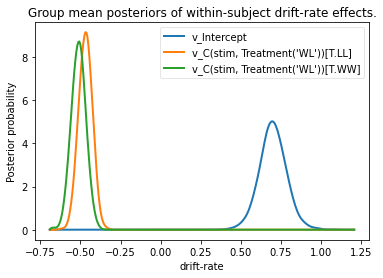

In [32]:
v_WL, v_LL, v_WW = m_reg_all.nodes_db.loc[["v_Intercept",
                                           "v_C(stim, Treatment('WL'))[T.LL]",
                                           "v_C(stim, Treatment('WL'))[T.WW]"], 'node']
hddm.analyze.plot_posterior_nodes([v_WL, v_LL, v_WW])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift-rate effects.')
# plt.savefig('hddm_demo_fig_07.pdf')

## Fitting regression models

In [33]:
m_reg = hddm.HDDMRegressor(data[data.dbs == 0],
                           "a ~ theta:C(conf, Treatment('LC'))",
                           depends_on={'v': 'stim'})
m_reg.sample(5000, burn=1000)

Adding these covariates:
['a_Intercept', "a_theta:C(conf, Treatment('LC'))[HC]", "a_theta:C(conf, Treatment('LC'))[LC]"]
 [-----------------100%-----------------] 5001 of 5000 complete in 1720.5 sec

P(a_theta < 0) =  0.0485


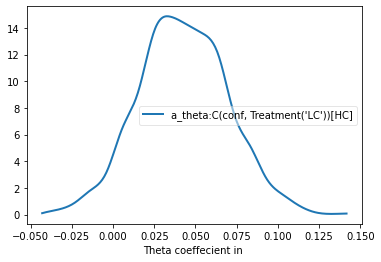

In [34]:
theta = m_reg.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=20)
plt.xlabel('Theta coeffecient in ')
print("P(a_theta < 0) = ", (theta.trace() < 0).mean())

In [35]:
m_reg_off = hddm.HDDMRegressor(data[data.dbs == 1],
                               "a ~ theta:C(conf, Treatment('LC'))",
                               depends_on={'v': 'stim'})
m_reg_off.sample(5000, burn=1000)

Adding these covariates:
['a_Intercept', "a_theta:C(conf, Treatment('LC'))[HC]", "a_theta:C(conf, Treatment('LC'))[LC]"]
 [-----------------100%-----------------] 5000 of 5000 complete in 1678.8 sec

P(a_theta > 0) =  0.05175


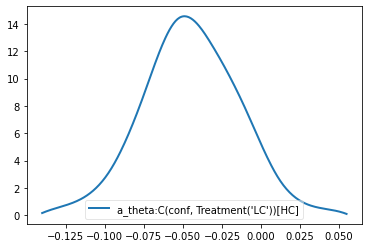

In [36]:
theta = m_reg_off.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=10)
print("P(a_theta > 0) = ", (theta.trace() > 0).mean())

## Dealing with outliers

This part of the tutorial seems outdated because, since 0.6.0, HDDM has a default setting `p_outliers=.05`. 

In [37]:
outlier_data, params = hddm.generate.gen_rand_data(params={'a': 2, 't': .4, 'v': .5},
                                                   size=200, n_fast_outliers=10)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
m_no_outlier = hddm.HDDM(outlier_data)
m_no_outlier.sample(2000, burn=50)

 [-----------------100%-----------------] 2000 of 2000 complete in 7.1 sec

Text(0, 0.5, 'Probability density')

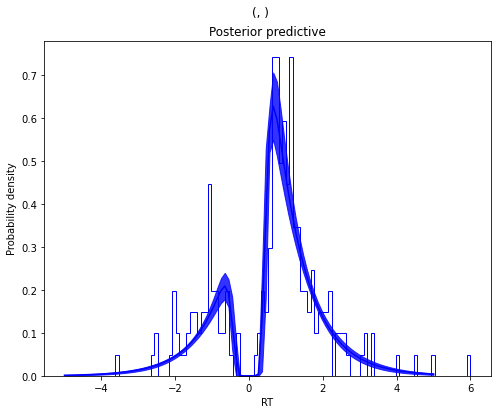

In [39]:
m_no_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
# plt.savefig('hddm_demo_fig_10.pdf')

In [40]:
m_outlier = hddm.HDDM(outlier_data, p_outlier=.05)
m_outlier.sample(2000, burn=20)

 [-----------------100%-----------------] 2000 of 2000 complete in 7.0 sec

Text(0, 0.5, 'Probability density')

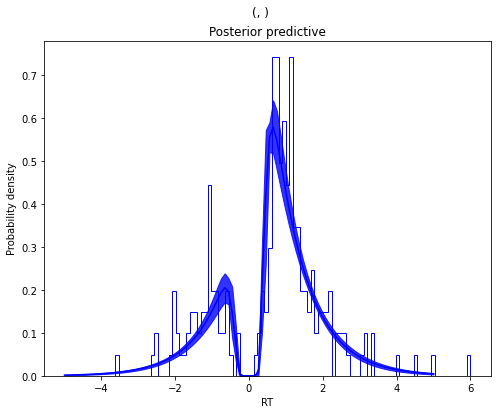

In [41]:
m_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
# plt.savefig('hddm_demo_fig_11.pdf')